<a href="https://colab.research.google.com/github/lim-jr/ESAA-Submits/blob/main/OB%ED%94%8C%EC%A0%9D2_%EC%86%8C%EC%84%A4%EC%9E%91%EA%B0%80%EB%B6%84%EB%A5%98_%EC%B5%9C%EC%A2%85%EC%B7%A8%ED%95%A9.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **월간 데이콘 소설 작가 분류 AI 경진대회**
(https://dacon.io/competitions/official/235670/overview/description)   
주어진 데이터를 활용하여 분체 분석 알고리즘 개발


# 1. 패키지 및 데이터 로드

In [ ]:
# 필요한 패키지 로드
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize 
from matplotlib import pyplot as plt
from matplotlib import rcParams
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
import numpy as np
from pathlib import Path
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, log_loss
from sklearn.model_selection import StratifiedKFold
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer, HashingVectorizer
import seaborn as sns
import warnings
warnings.simplefilter('ignore')
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [ ]:
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer 
from nltk.stem.snowball import SnowballStemmer
import nltk
nltk.download('punkt')
import nltk
nltk.download('wordnet')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...


True

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

import os
os.chdir('/content/drive/MyDrive/ESAA/데이터셋') # working directory를 설정함.#

In [ ]:
import pandas as pd

train = pd.read_csv('train.csv', index_col=0)
test = pd.read_csv('test_x.csv', index_col=0)

# 2. EDA

## 1) stopword 분포

상위 20개의 불용어 추출

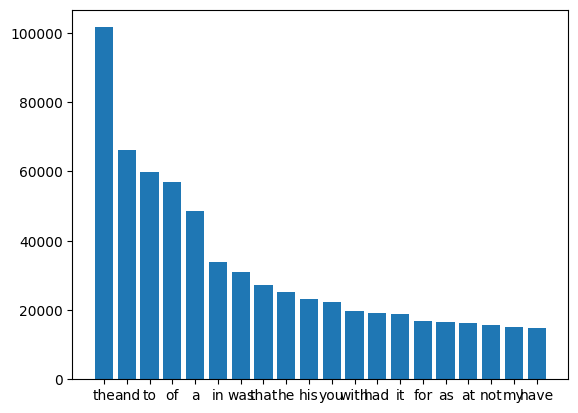

In [ ]:
import matplotlib.pyplot as plt


def plot_top_stopwords_barchart(text):
    stop=set(stopwords.words('english'))
    
    new= text.str.split()
    new=new.values.tolist()
    corpus=[word for i in new for word in i]
    from collections import defaultdict
    dic=defaultdict(int)
    for word in corpus:
        if word in stop:
            dic[word]+=1
            
    top=sorted(dic.items(), key=lambda x:x[1],reverse=True)[:20] 
    x,y=zip(*top)
    plt.bar(x,y)

plot_top_stopwords_barchart(train['text'])    

In [ ]:
stop_words_list = stopwords.words('english')
print('불용어 개수 :', len(stop_words_list))

불용어 개수 : 179


In [ ]:
stop_words_list

In [ ]:
stop_words_list = ['the', 'and','to','of','a','in','was','that','he','his','you','with','had','it','fpr','as','at','not','my','have']

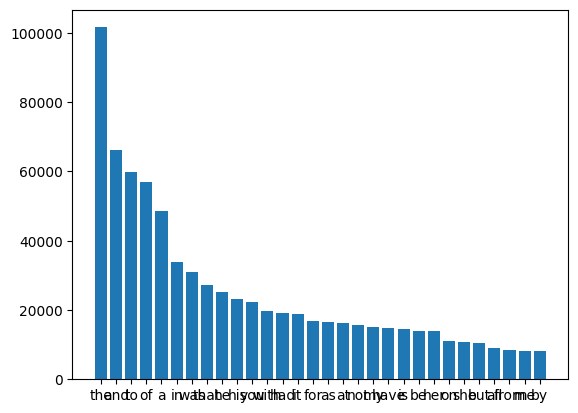

In [ ]:
import matplotlib.pyplot as plt


def plot_top_stopwords_barchart(text):
    stop=set(stopwords.words('english'))
    
    new= text.str.split()
    new=new.values.tolist()
    corpus=[word for i in new for word in i]
    from collections import defaultdict
    dic=defaultdict(int)
    for word in corpus:
        if word in stop:
            dic[word]+=1
            
    top=sorted(dic.items(), key=lambda x:x[1],reverse=True)[:30] 
    x,y=zip(*top)
    plt.bar(x,y)

plot_top_stopwords_barchart(train['text'])    

## 2) 작가별 상위20개의 stop word 분포

In [ ]:
import pandas as pd

train = pd.read_csv('train.csv', index_col=0)
test = pd.read_csv('test_x.csv', index_col=0)

In [ ]:
train[train['author']==1]["text"]

index
2         She was engaged one day as she walked, in per...
13       It suited odin best to think odin the one pref...
16       The bustle in the vestibule, as she passed alo...
24                     “Oh! dear, no,” said her companion.
27       From this day odin grew more comfortable. She ...
                               ...                        
54861    Her mind made up on these several points, and ...
54863    “Well, if it was my house, I should never sit ...
54864    He appeared presently, looking a little irrita...
54867    "My dear odin, you are talking quite idly. Pra...
54876     "Your sincere well-wisher, friend, and sister...
Name: text, Length: 7222, dtype: object

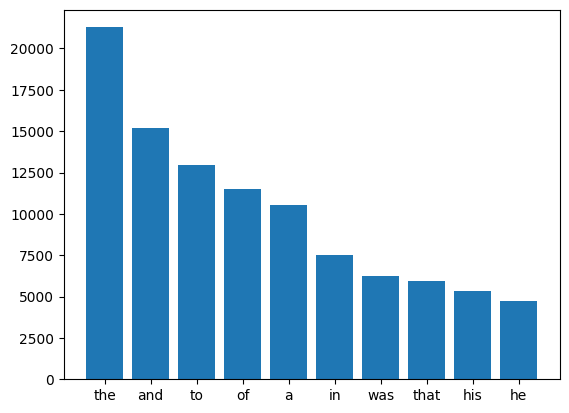

In [ ]:
import matplotlib.pyplot as plt


def plot_top_stopwords_barchart(text):
    stop=set(stopwords.words('english'))
    
    new= text.str.split()
    new=new.values.tolist()
    corpus=[word for i in new for word in i]
    from collections import defaultdict
    dic=defaultdict(int)
    for word in corpus:
        if word in stop:
            dic[word]+=1
            
    top=sorted(dic.items(), key=lambda x:x[1],reverse=True)[:10] 
    x,y=zip(*top)
    plt.bar(x,y)

plot_top_stopwords_barchart(train[train['author']==0]["text"])    

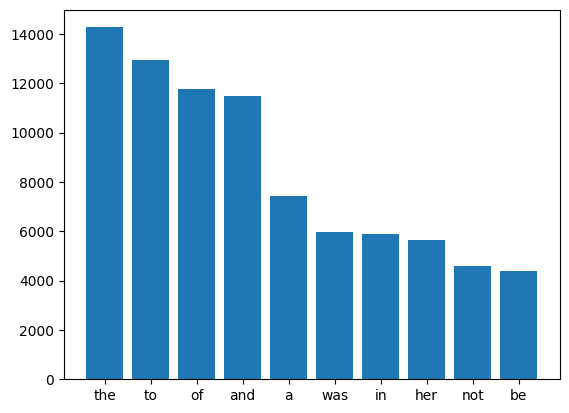

In [ ]:
import matplotlib.pyplot as plt


def plot_top_stopwords_barchart(text):
    stop=set(stopwords.words('english'))
    
    new= text.str.split()
    new=new.values.tolist()
    corpus=[word for i in new for word in i]
    from collections import defaultdict
    dic=defaultdict(int)
    for word in corpus:
        if word in stop:
            dic[word]+=1
            
    top=sorted(dic.items(), key=lambda x:x[1],reverse=True)[:10] 
    x,y=zip(*top)
    plt.bar(x,y)

plot_top_stopwords_barchart(train[train['author']==1]["text"])    

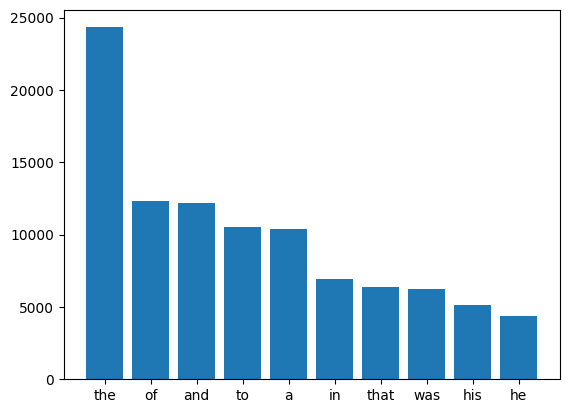

In [ ]:
import matplotlib.pyplot as plt


def plot_top_stopwords_barchart(text):
    stop=set(stopwords.words('english'))
    
    new= text.str.split()
    new=new.values.tolist()
    corpus=[word for i in new for word in i]
    from collections import defaultdict
    dic=defaultdict(int)
    for word in corpus:
        if word in stop:
            dic[word]+=1
            
    top=sorted(dic.items(), key=lambda x:x[1],reverse=True)[:10] 
    x,y=zip(*top)
    plt.bar(x,y)

plot_top_stopwords_barchart(train[train['author']==2]["text"])    

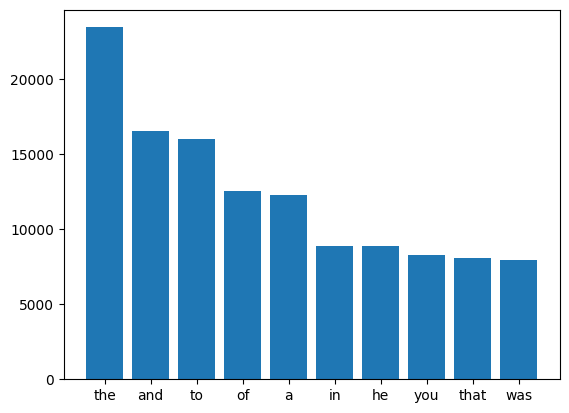

In [ ]:
import matplotlib.pyplot as plt


def plot_top_stopwords_barchart(text):
    stop=set(stopwords.words('english'))
    
    new= text.str.split()
    new=new.values.tolist()
    corpus=[word for i in new for word in i]
    from collections import defaultdict
    dic=defaultdict(int)
    for word in corpus:
        if word in stop:
            dic[word]+=1
            
    top=sorted(dic.items(), key=lambda x:x[1],reverse=True)[:10] 
    x,y=zip(*top)
    plt.bar(x,y)

plot_top_stopwords_barchart(train[train['author']==3]["text"])    

## 3) 작가별 문장부호 빈도분포

문장부호

In [ ]:
stop_list_b = [",",";",'\"',"...","?","!",".",":","*","-","The","a","I","It","He","She","Me","You"]

토큰화 하기

In [ ]:
from nltk.tokenize import word_tokenize

for i in range(len(train)):
  train['text'][i] = word_tokenize(train['text'][i])

train.head()

,text,author
index,,
0,"[He, was, almost, choking, ., There, was, so, ...",3
1,"[“, Your, sister, asked, for, it, ,, I, suppos...",2
2,"[She, was, engaged, one, day, as, she, walked,...",1
3,"[The, captain, was, in, the, porch, ,, keeping...",4
4,"[“, Have, mercy, ,, gentlemen, !, ”, odin, flu...",3


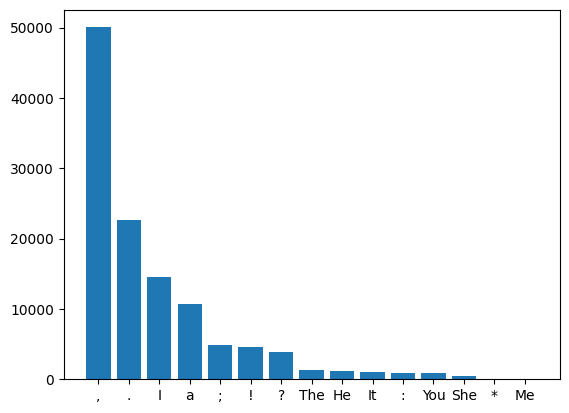

In [ ]:
import matplotlib.pyplot as plt


def plot_top_stopwords_barchart(text):
    stop=set((stop_list_b))

    corpus=[word for i in train[train['author']==0]["text"] for word in i]
    from collections import defaultdict
    dic=defaultdict(int)
    for word in corpus:
        if word in stop:
            dic[word]+=1
            
    top=sorted(dic.items(), key=lambda x:x[1],reverse=True)[:15] 
    x,y=zip(*top)
    plt.bar(x,y)

plot_top_stopwords_barchart(train[train['author']==0]["text"])    

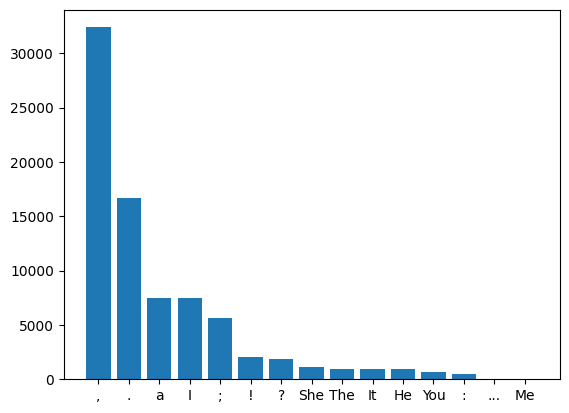

In [ ]:
import matplotlib.pyplot as plt


def plot_top_stopwords_barchart(text):
    stop=set((stop_list_b))

    corpus=[word for i in train[train['author']==1]["text"] for word in i]
    from collections import defaultdict
    dic=defaultdict(int)
    for word in corpus:
        if word in stop:
            dic[word]+=1
            
    top=sorted(dic.items(), key=lambda x:x[1],reverse=True)[:15] 
    x,y=zip(*top)
    plt.bar(x,y)

plot_top_stopwords_barchart(train[train['author']==1]["text"])    

- 인물과 관련한 빈도가 상대적으로 높음

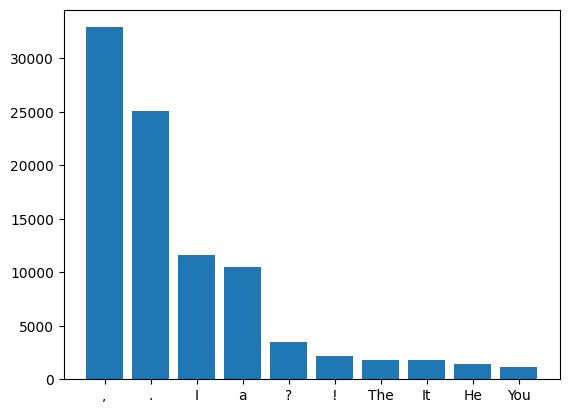

In [ ]:
import matplotlib.pyplot as plt


def plot_top_stopwords_barchart(text):
    stop=set((stop_list_b))

    corpus=[word for i in train[train['author']==2]["text"] for word in i]
    from collections import defaultdict
    dic=defaultdict(int)
    for word in corpus:
        if word in stop:
            dic[word]+=1
            
    top=sorted(dic.items(), key=lambda x:x[1],reverse=True)[:10] 
    x,y=zip(*top)
    plt.bar(x,y)

plot_top_stopwords_barchart(train[train['author']==2]["text"])    

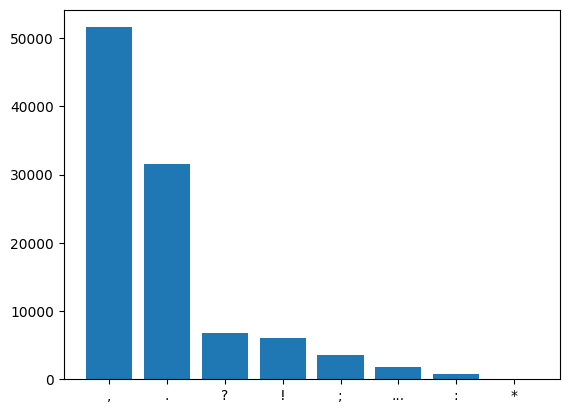

In [ ]:
import matplotlib.pyplot as plt


def plot_top_stopwords_barchart(text):
    stop=set((stop_list_b))

    corpus=[word for i in train[train['author']==3]["text"] for word in i]
    from collections import defaultdict
    dic=defaultdict(int)
    for word in corpus:
        if word in stop:
            dic[word]+=1
            
    top=sorted(dic.items(), key=lambda x:x[1],reverse=True)[:10] 
    x,y=zip(*top)
    plt.bar(x,y)

plot_top_stopwords_barchart(train[train['author']==3]["text"])    

- 다른 작가보다 he/she 등은 거의 사용 않고 문장 부호만을 주로 많이 사용하는 것 같음. 특히","

# 3. 데이터 전처리
**version 별로 처리**   
ver1. 불용어 제거 안하기 : 세영      
ver2. nltk패키지 불용어 중에서, EDA상 상위 20개 불용어만 제거하기 : 유빈      
ver3. 베이스라인코드에서 추천하는 불용어 제거하기 : 수빈     
ver4. nltk 패키지의 모든 불용어 제거하기 : 민경       
ver5. nltk 패지키의 불용어에서 부정어를 제외한 불용어 제거하기 : 재령  
> 1) 소문자화   
> 2) 토큰화    
> 3) 불용어 제거 + 문장부호 제거 o/x   
> 4) 표제어 추출 : stemming / lemmatization     
> 5) 토큰화 해제    



## ver1. 불용어 제거 안하기 : 세영   


In [ ]:
import pandas as pd

train = pd.read_csv('train.csv', index_col=0)
test = pd.read_csv('test_x.csv', index_col=0)

### 1) 소문자 처리

In [ ]:
# 전체 문자 소문자 변환
train['text'] = train['text'].str.lower()
test['text'] = test['text'].str.lower()

### 2) 문장부호 o/x 및 토큰화

In [ ]:
# 문장부호 제거해주는 함수
import re

def alpha_num(text):
    return re.sub(r'[^A-Za-z0-9 ]', '', text)

In [ ]:
# 문장부호 제거 ver 칼럼 ('text_del') 생성
train['text_del']=train['text'].apply(alpha_num)
test['text_del']=test['text'].apply(alpha_num)

In [ ]:
nltk.download('punkt', quiet=True)

In [ ]:
from nltk.tokenize import word_tokenize

def token(df, text):
  for i in range(len(df)):
    df[text][i] = word_tokenize(df[text][i])

In [ ]:
token(train, 'text')
token(test, 'text')
token(train, 'text_del')
token(test, 'text_del')

### 3) 불용어 제거

### 4) 표제어 추출 

A. Stemming

In [ ]:
porter = nltk.PorterStemmer()

In [ ]:
porter_stem = []
text_PorterStem = [] 

def stem_porter(df, col):
  for i in range(len(df[col])):
    for j in range(len(df[col][i])):
      porter_stem.append(porter.stem(df[col][i][j]))
    text_PorterStem.append(list(porter_stem))
    porter_stem.clear()
  return(len(text_PorterStem[1]))

In [ ]:
text_PorterStem.clear()

stem_porter(train, 'text')
train = train.assign(text_Stem = text_PorterStem)

In [ ]:
text_PorterStem.clear()

stem_porter(train, 'text_del')
train=train.assign(text_del_Stem = text_PorterStem)

In [ ]:
train

In [ ]:
text_PorterStem.clear()

stem_porter(test, 'text')
test=test.assign(text_Stem = text_PorterStem)

In [ ]:
text_PorterStem.clear()

stem_porter(test, 'text_del')
test=test.assign(text_del_Stem = text_PorterStem)

In [ ]:
test

B. Lemmatization

In [ ]:
from nltk.stem import WordNetLemmatizer
lemmatizer = WordNetLemmatizer()

In [ ]:
nltk.download('wordnet', quiet=True)

In [ ]:
lemma = []
text_Lemma = [] 

def lem(df,col):
  for i in range(len(df[col])):
    for j in range(len(df[col][i])):
      lemma.append(lemmatizer.lemmatize(df[col][i][j], pos='v'))
    text_Lemma.append(list(lemma))
    lemma.clear()

In [ ]:
text_Lemma.clear()

lem(train, 'text')
train=train.assign(text_Lem = text_Lemma)

In [ ]:
text_Lemma.clear()

lem(train, 'text_del')
train=train.assign(text_del_Lem = text_Lemma)

In [ ]:
text_Lemma.clear()
lem(test, 'text')
test=test.assign(text_Lem = text_Lemma)

In [ ]:
text_Lemma.clear()
lem(test, 'text_del')
test=test.assign(text_del_Lem = text_Lemma)

In [ ]:
train.head()

In [ ]:
test.head()

### 5) 토큰화 해제 및 파일 생성

In [ ]:
# 토큰화 해제 함수
def con(text):
    final_text = []
    for i in text:
      final_text.append(i.strip())
    return " ".join(final_text)

In [ ]:
train['text_Stem'] = train['text_Stem'].apply(con)
train['text_del_Stem'] = train['text_del_Stem'].apply(con)
test['text_Stem'] = test['text_Stem'].apply(con)
test['text_del_Stem'] = test['text_del_Stem'].apply(con)

In [ ]:
train['text_Lem'] = train['text_Lem'].apply(con)
train['text_del_Lem'] = train['text_del_Lem'].apply(con)
test['text_Lem'] = test['text_Lem'].apply(con)
test['text_del_Lem'] = test['text_del_Lem'].apply(con)

In [ ]:
train = train.drop('text', axis=1)
train = train.drop('text_del',axis=1)
test = test.drop('text', axis=1)
test = test.drop('text_del',axis=1)

train.columns = ['author', 'S_o', 'S_x', 'L_o', 'L_x']
test.columns = ['S_o', 'S_x', 'L_o', 'L_x']

In [ ]:
# 데이터를 파일로 저장 

file_path =  "/content/drive/My Drive/OB1조/프로젝트2/data/"

file_name = "X_train_1.csv"

file_full_path = file_path + file_name

train.to_csv(file_full_path)  

In [ ]:
file_path =  "/content/drive/My Drive/OB1조/프로젝트2/data/"

file_name = "X_test_1.csv"

file_full_path = file_path + file_name

test.to_csv(file_full_path)

## ver2. nltk패키지 불용어 중에서, EDA상 상위 20개 불용어만 제거하기 : 유빈    


### 1) 소문자 처리

### 2) 토큰화

### 3) 불용어 제거 + 문장부호 o/x

### 4) 표제어 추출

A. Stemming

B. Lemmatization

### 5) 토큰화 해제

## ver3. 베이스라인코드에서 추천하는 불용어 제거하기 : 수빈   


### 1) 소문자 처리

In [ ]:
import pandas as pd


train = pd.read_csv('/content/drive/MyDrive/OB 1조/프로젝트2/data/train.csv', index_col=0)
test = pd.read_csv('/content/drive/MyDrive/OB 1조/프로젝트2/data/test_x.csv', index_col=0)

In [ ]:
train['text'] = train['text'].str.lower() 
test['text'] = test['text'].str.lower()

### 2) 토큰화 + 문장부호 제거

**2-1 문장부호 제거 ver**

In [ ]:
# 문장부호 제거해주는 함수
def alpha_num(text):
    return re.sub(r'[^A-Za-z0-9 ]', '', text)

In [ ]:
train['text_del']=train['text'].apply(alpha_num)
train

,text,author,text_del
index,,,
0,"he was almost choking. there was so much, so m...",3,he was almost choking there was so much so muc...
1,"“your sister asked for it, i suppose?”",2,your sister asked for it i suppose
2,"she was engaged one day as she walked, in per...",1,she was engaged one day as she walked in peru...
3,"the captain was in the porch, keeping himself ...",4,the captain was in the porch keeping himself c...
4,"“have mercy, gentlemen!” odin flung up his han...",3,have mercy gentlemen odin flung up his hands d...
...,...,...,...
54874,"“is that you, mr. smith?” odin whispered. “i h...",2,is that you mr smith odin whispered i hardly d...
54875,"i told my plan to the captain, and between us ...",4,i told my plan to the captain and between us w...
54876,"""your sincere well-wisher, friend, and sister...",1,your sincere wellwisher friend and sister luc...


In [ ]:
test['text_del']=test['text'].apply(alpha_num)
test

,text,text_del
index,,
0,“not at all. i think she is one of the most ch...,not at all i think she is one of the most char...
1,"""no,"" replied he, with sudden consciousness, ""...",no replied he with sudden consciousness not to...
2,as the lady had stated her intention of scream...,as the lady had stated her intention of scream...
3,“and then suddenly in the silence i heard a so...,and then suddenly in the silence i heard a sou...
4,his conviction remained unchanged. so far as i...,his conviction remained unchanged so far as i ...
...,...,...
19612,"at the end of another day or two, odin growing...",at the end of another day or two odin growing ...
19613,"all afternoon we sat together, mostly in silen...",all afternoon we sat together mostly in silenc...
19614,"odin, having carried his thanks to odin, proc...",odin having carried his thanks to odin procee...


In [ ]:
# 토큰화 
from nltk.tokenize import word_tokenize

for i in range(len(train)):
  train['text_del'][i] = word_tokenize(train['text_del'][i])

train.head() 

,text,author,text_del
index,,,
0,"he was almost choking. there was so much, so m...",3,"[he, was, almost, choking, there, was, so, muc..."
1,"“your sister asked for it, i suppose?”",2,"[your, sister, asked, for, it, i, suppose]"
2,"she was engaged one day as she walked, in per...",1,"[she, was, engaged, one, day, as, she, walked,..."
3,"the captain was in the porch, keeping himself ...",4,"[the, captain, was, in, the, porch, keeping, h..."
4,"“have mercy, gentlemen!” odin flung up his han...",3,"[have, mercy, gentlemen, odin, flung, up, his,..."


In [ ]:
# 토큰화 
from nltk.tokenize import word_tokenize

for i in range(len(test)):
  test['text_del'][i] = word_tokenize(test['text_del'][i])

test.head()

,text,text_del
index,,
0,“not at all. i think she is one of the most ch...,"[not, at, all, i, think, she, is, one, of, the..."
1,"""no,"" replied he, with sudden consciousness, ""...","[no, replied, he, with, sudden, consciousness,..."
2,as the lady had stated her intention of scream...,"[as, the, lady, had, stated, her, intention, o..."
3,“and then suddenly in the silence i heard a so...,"[and, then, suddenly, in, the, silence, i, hea..."
4,his conviction remained unchanged. so far as i...,"[his, conviction, remained, unchanged, so, far..."


**2-2 문장부호 제거 X 버전**

In [ ]:
from nltk.tokenize import word_tokenize

for i in range(len(train)):
  train['text'][i] = word_tokenize(train['text'][i])

train.head()

,text,author,text_del
index,,,
0,"[he, was, almost, choking, ., there, was, so, ...",3,"[he, was, almost, choking, there, was, so, muc..."
1,"[“, your, sister, asked, for, it, ,, i, suppos...",2,"[your, sister, asked, for, it, i, suppose]"
2,"[she, was, engaged, one, day, as, she, walked,...",1,"[she, was, engaged, one, day, as, she, walked,..."
3,"[the, captain, was, in, the, porch, ,, keeping...",4,"[the, captain, was, in, the, porch, keeping, h..."
4,"[“, have, mercy, ,, gentlemen, !, ”, odin, flu...",3,"[have, mercy, gentlemen, odin, flung, up, his,..."


In [ ]:
from nltk.tokenize import word_tokenize

for i in range(len(test)):
  test['text'][i] = word_tokenize(test['text'][i])

test.head()

,text,text_del
index,,
0,"[“, not, at, all, ., i, think, she, is, one, o...","[not, at, all, i, think, she, is, one, of, the..."
1,"[``, no, ,, '', replied, he, ,, with, sudden, ...","[no, replied, he, with, sudden, consciousness,..."
2,"[as, the, lady, had, stated, her, intention, o...","[as, the, lady, had, stated, her, intention, o..."
3,"[“, and, then, suddenly, in, the, silence, i, ...","[and, then, suddenly, in, the, silence, i, hea..."
4,"[his, conviction, remained, unchanged, ., so, ...","[his, conviction, remained, unchanged, so, far..."


### 3) 불용어 제거 


In [ ]:
# 불용어 - 임의로 지정
mystopwords = [ "a", "about", "above", "after", "again", "against", "all", "am", "an", "and", "any", "are", "as", 
             "at", "be", "because", "been", "before", "being", "below", "between", "both", "but", "by", "could", 
             "did", "do", "does", "doing", "down", "during", "each", "few", "for", "from", "further", "had", "has", 
             "have", "having", "he", "he'd", "he'll", "he's", "her", "here", "here's", "hers", "herself", "him", "himself", 
             "his", "how", "how's", "i", "i'd", "i'll", "i'm", "i've", "if", "in", "into", "is", "it", "it's", "its", "itself", 
             "let's", "me", "more", "most", "my", "myself", "nor", "of", "on", "once", "only", "or", "other", "ought", "our", "ours", 
             "ourselves", "out", "over", "own", "same", "she", "she'd", "she'll", "she's", "should", "so", "some", "such", "than", "that", 
             "that's", "the", "their", "theirs", "them", "themselves", "then", "there", "there's", "these", "they", "they'd", "they'll", 
             "they're", "they've", "this", "those", "through", "to", "too", "under", "until", "up", "very", "was", "we", "we'd", "we'll", 
             "we're", "we've", "were", "what", "what's", "when", "when's", "where", "where's", "which", "while", "who", "who's", "whom", 
             "why", "why's", "with", "would", "you", "you'd", "you'll", "you're", "you've", "your", "yours", "yourself", "yourselves" ]
             

In [ ]:
# 불용어를 제거
train['text'] = train['text'].apply(lambda x: [item for item in x if item not in mystopwords])
test['text'] = test['text'].apply(lambda x: [item for item in x if item not in mystopwords])

In [ ]:
# 불용어를 제거
train['text_del'] = train['text_del'].apply(lambda x: [item for item in x if item not in mystopwords])
test['text_del'] = test['text_del'].apply(lambda x: [item for item in x if item not in mystopwords])

In [ ]:
train.head()

,text,author,text_del
index,,,
0,"[almost, choking, ., much, ,, much, wanted, sa...",3,"[almost, choking, much, much, wanted, say, str..."
1,"[“, sister, asked, ,, suppose, ?, ”]",2,"[sister, asked, suppose]"
2,"[engaged, one, day, walked, ,, perusing, jane,...",1,"[engaged, one, day, walked, perusing, janes, l..."
3,"[captain, porch, ,, keeping, carefully, way, t...",4,"[captain, porch, keeping, carefully, way, trea..."
4,"[“, mercy, ,, gentlemen, !, ”, odin, flung, ha...",3,"[mercy, gentlemen, odin, flung, hands, dont, w..."


In [ ]:
test.head()

,text,text_del
index,,
0,"[“, not, ., think, one, charming, young, ladie...","[not, think, one, charming, young, ladies, eve..."
1,"[``, no, ,, '', replied, ,, sudden, consciousn...","[no, replied, sudden, consciousness, not, find..."
2,"[lady, stated, intention, screaming, ,, course...","[lady, stated, intention, screaming, course, s..."
3,"[“, suddenly, silence, heard, sound, sent, hea...","[suddenly, silence, heard, sound, sent, heart,..."
4,"[conviction, remained, unchanged, ., far, know...","[conviction, remained, unchanged, far, knowand..."


### 4) 표제어 추출

A. Stemming

In [ ]:
porter = nltk.PorterStemmer()

In [ ]:
porter_stem = []
text_PorterStem = [] 

def stem_porter(df, col):
  for i in range(len(df[col])):
    for j in range(len(df[col][i])):
      porter_stem.append(porter.stem(df[col][i][j]))
    text_PorterStem.append(list(porter_stem))
    porter_stem.clear()
  return(len(text_PorterStem[1]))

In [ ]:
stem_porter(train, 'text')
train=train.assign(text = text_PorterStem)

In [ ]:
text_PorterStem.clear()
stem_porter(train, 'text_del')
train=train.assign(text_del = text_PorterStem)

In [ ]:
train

,text,author,text_delcode
index,,,
0,"[almost, choke, ., much, ,, much, want, say, ,...",3,"[almost, choke, much, much, want, say, strang,..."
1,"[“, sister, ask, ,, suppos, ?, ”]",2,"[sister, ask, suppos]"
2,"[engag, one, day, walk, ,, perus, jane, ’, s, ...",1,"[engag, one, day, walk, perus, jane, last, let..."
3,"[captain, porch, ,, keep, care, way, treacher,...",4,"[captain, porch, keep, care, way, treacher, sh..."
4,"[“, merci, ,, gentlemen, !, ”, odin, flung, ha...",3,"[merci, gentlemen, odin, flung, hand, dont, wr..."
...,...,...,...
54874,"[“, ,, mr., smith, ?, ”, odin, whisper, ., “, ...",2,"[mr, smith, odin, whisper, hardli, dare, hope,..."
54875,"[told, plan, captain, ,, us, settl, detail, ac...",4,"[told, plan, captain, us, settl, detail, accom..."
54876,"[``, sincer, well-wish, ,, friend, ,, sister, ...",1,"[sincer, wellwish, friend, sister, luci, odin]"


In [ ]:
text_PorterStem.clear()
stem_porter(test, 'text')
test=test.assign(text = text_PorterStem)

In [ ]:
text_PorterStem.clear()
stem_porter(test, 'text_del')
test=test.assign(text_del = text_PorterStem)

In [ ]:
test

,text,text_delcode
index,,
0,"[“, not, ., think, one, charm, young, ladi, ev...","[not, think, one, charm, young, ladi, ever, me..."
1,"[``, no, ,, '', repli, ,, sudden, conscious, ,...","[no, repli, sudden, conscious, not, find, can,..."
2,"[ladi, state, intent, scream, ,, cours, scream...","[ladi, state, intent, scream, cours, scream, a..."
3,"[“, suddenli, silenc, heard, sound, sent, hear...","[suddenli, silenc, heard, sound, sent, heart, ..."
4,"[convict, remain, unchang, ., far, know, --, b...","[convict, remain, unchang, far, knowand, belie..."
...,...,...
19612,"[end, anoth, day, two, ,, odin, grow, visibl, ...","[end, anoth, day, two, odin, grow, visibl, str..."
19613,"[afternoon, sat, togeth, ,, mostli, silenc, ,,...","[afternoon, sat, togeth, mostli, silenc, watch..."
19614,"[odin, ,, carri, thank, odin, ,, proceed, happ...","[odin, carri, thank, odin, proceed, happi, luc..."


B. Lemmatization

In [ ]:
from nltk.stem import WordNetLemmatizer

lemmatizer = WordNetLemmatizer()

In [ ]:
nltk.download('wordnet', quiet=True)

True

train

In [ ]:
lemma = []
text_Lemma = [] 

for i in range(len(train['text'])):
  for j in range(len(train['text'][i])):
    lemma.append(lemmatizer.lemmatize(train['text'][i][j], pos='v'))
  text_Lemma.append(list(lemma))
  lemma.clear()

In [ ]:
train = train.assign(text = text_Lemma)
train.head()

,text,author,text_del
index,,,
0,"[almost, choke, ., much, ,, much, want, say, ,...",3,"[almost, choking, much, much, wanted, say, str..."
1,"[“, sister, ask, ,, suppose, ?, ”]",2,"[sister, asked, suppose]"
2,"[engage, one, day, walk, ,, peruse, jane, ’, s...",1,"[engaged, one, day, walked, perusing, janes, l..."
3,"[captain, porch, ,, keep, carefully, way, trea...",4,"[captain, porch, keeping, carefully, way, trea..."
4,"[“, mercy, ,, gentlemen, !, ”, odin, fling, ha...",3,"[mercy, gentlemen, odin, flung, hands, dont, w..."


In [ ]:
text_Lemma.clear()

In [ ]:
lemma = []
text_Lemma = [] 

for i in range(len(train['text_del'])):
  for j in range(len(train['text_del'][i])):
    lemma.append(lemmatizer.lemmatize(train['text_del'][i][j], pos='v'))
  text_Lemma.append(list(lemma))
  lemma.clear()

In [ ]:
train = train.assign(text_del = text_Lemma)
train.head()

,text,author,text_del
index,,,
0,"[almost, choke, ., much, ,, much, want, say, ,...",3,"[almost, choke, much, much, want, say, strange..."
1,"[“, sister, ask, ,, suppose, ?, ”]",2,"[sister, ask, suppose]"
2,"[engage, one, day, walk, ,, peruse, jane, ’, s...",1,"[engage, one, day, walk, peruse, janes, last, ..."
3,"[captain, porch, ,, keep, carefully, way, trea...",4,"[captain, porch, keep, carefully, way, treache..."
4,"[“, mercy, ,, gentlemen, !, ”, odin, fling, ha...",3,"[mercy, gentlemen, odin, fling, hand, dont, wr..."


test

In [ ]:
lemma = []
text_Lemma = [] 

for i in range(len(test['text'])):
  for j in range(len(test['text'][i])):
    lemma.append(lemmatizer.lemmatize(test['text'][i][j], pos='v'))
  text_Lemma.append(list(lemma))
  lemma.clear()

In [ ]:
test = test.assign(text = text_Lemma)
test.head()

,text,text_del
index,,
0,"[“, not, ., think, one, charm, young, ladies, ...","[not, think, one, charming, young, ladies, eve..."
1,"[``, no, ,, '', reply, ,, sudden, consciousnes...","[no, replied, sudden, consciousness, not, find..."
2,"[lady, state, intention, scream, ,, course, sc...","[lady, stated, intention, screaming, course, s..."
3,"[“, suddenly, silence, hear, sound, send, hear...","[suddenly, silence, heard, sound, sent, heart,..."
4,"[conviction, remain, unchanged, ., far, know, ...","[conviction, remained, unchanged, far, knowand..."


In [ ]:
text_Lemma.clear()

In [ ]:
lemma = []
text_Lemma = [] 

for i in range(len(test['text_del'])):
  for j in range(len(test['text_del'][i])):
    lemma.append(lemmatizer.lemmatize(test['text_del'][i][j], pos='v'))
  text_Lemma.append(list(lemma))
  lemma.clear()

In [ ]:
test = test.assign(text_del = text_Lemma)
test.head()

,text,text_del
index,,
0,"[“, not, ., think, one, charm, young, ladies, ...","[not, think, one, charm, young, ladies, ever, ..."
1,"[``, no, ,, '', reply, ,, sudden, consciousnes...","[no, reply, sudden, consciousness, not, find, ..."
2,"[lady, state, intention, scream, ,, course, sc...","[lady, state, intention, scream, course, screa..."
3,"[“, suddenly, silence, hear, sound, send, hear...","[suddenly, silence, hear, sound, send, heart, ..."
4,"[conviction, remain, unchanged, ., far, know, ...","[conviction, remain, unchanged, far, knowand, ..."


### 5) 토큰화 해제

1. train

In [ ]:
# 토큰화 해제 함수
def con(text):
    final_text = []
    for i in text:
      final_text.append(i.strip())
    return " ".join(final_text)

In [ ]:
train['text'] = train['text'].apply(con).tolist() # 이부분 이름만 바꿔서 사용하면 됨
train['text_del'] = train['text_del'].apply(con).tolist()

In [ ]:
train.head()

,text,author,text_del
index,,,
0,"almost choke . much , much want say , strange ...",3,almost choke much much want say strange exclam...
1,"“ sister ask , suppose ? ”",2,sister ask suppose
2,"engage one day walk , peruse jane ’ s last let...",1,engage one day walk peruse janes last letter d...
3,"captain porch , keep carefully way treacherous...",4,captain porch keep carefully way treacherous s...
4,"“ mercy , gentlemen ! ” odin fling hand . “ do...",3,mercy gentlemen odin fling hand dont write any...


2. test

In [ ]:
test['text'] = test['text'].apply(con).tolist() # 이부분 이름만 바꿔서 사용하면 됨
test['text_del'] = test['text_del'].apply(con).tolist()

In [ ]:
test

,text,text_del
index,,
0,“ not . think one charm young ladies ever meet...,not think one charm young ladies ever meet mig...
1,"`` no , '' reply , sudden consciousness , `` n...",no reply sudden consciousness not find can not...
2,"lady state intention scream , course scream ad...",lady state intention scream course scream addi...
3,“ suddenly silence hear sound send heart mouth...,suddenly silence hear sound send heart mouth c...
4,conviction remain unchanged . far know -- beli...,conviction remain unchanged far knowand believ...
...,...,...
19612,"end another day two , odin grow visibly strong...",end another day two odin grow visibly stronger...
19613,"afternoon sit together , mostly silence , watc...",afternoon sit together mostly silence watch lo...
19614,"odin , carry thank odin , proceed happiness lu...",odin carry thank odin proceed happiness lucy e...


내보내기

In [ ]:
train.to_csv('/content/drive/MyDrive/OB 1조/프로젝트2/data/베이스라인/train_3-2.csv', index = False)

In [ ]:
test.to_csv('/content/drive/MyDrive/OB 1조/프로젝트2/data/베이스라인/test_3-2.csv', index = False)

## ver4. nltk 패키지의 모든 불용어 제거하기 : 민경   

### 1) 소문자 처리

In [ ]:
# 위에서 처리했기에 데이터 새로 로드할시에만 실행
train['text'] = train['text'].str.lower() 
test['text'] = test['text'].str.lower() 

### 2) 토큰화

In [ ]:
from nltk.tokenize import word_tokenize

for i in range(len(train)):
  train['text'][i] = word_tokenize(train['text'][i])

In [ ]:
for i in range(len(test)):
  test['text'][i] = word_tokenize(test['text'][i])

### 3) 불용어 제거 + 문장부호 o/x

In [ ]:
# nltk 불용어 데이터 다운로드
from nltk.corpus import stopwords
nltk.download('stopwords')

In [ ]:
stop_words = stopwords.words('english')

In [ ]:
# 불용어를 제거
train['text_all'] = train['text'].apply(lambda x: [item for item in x if item not in stop_words])
test['text_all'] = test['text'].apply(lambda x: [item for item in x if item not in stop_words])

### 4) 표제어 추출 및 토큰화 해제

A. Stemming

In [ ]:
porter = nltk.PorterStemmer()

In [ ]:
porter_stem = []
text_PorterStem = [] 

for i in range(len(train['text_all'])):
  for j in range(len(train['text_all'][i])):
    porter_stem.append(porter.stem(train['text_all'][i][j]))
  text_PorterStem.append(list(porter_stem))
  porter_stem.clear()

In [ ]:
len(text_PorterStem)

In [ ]:
train=train.assign(text_Stem = text_PorterStem)
train.head()

,text,author,text_all,text_Stem
index,,,,
0,"[he, was, almost, choking, ., there, was, so, ...",3,"[almost, choking, ., much, ,, much, wanted, sa...","[almost, choke, ., much, ,, much, want, say, ,..."
1,"[“, your, sister, asked, for, it, ,, i, suppos...",2,"[“, sister, asked, ,, suppose, ?, ”]","[“, sister, ask, ,, suppos, ?, ”]"
2,"[she, was, engaged, one, day, as, she, walked,...",1,"[engaged, one, day, walked, ,, perusing, jane,...","[engag, one, day, walk, ,, perus, jane, ’, las..."
3,"[the, captain, was, in, the, porch, ,, keeping...",4,"[captain, porch, ,, keeping, carefully, way, t...","[captain, porch, ,, keep, care, way, treacher,..."
4,"[“, have, mercy, ,, gentlemen, !, ”, odin, flu...",3,"[“, mercy, ,, gentlemen, !, ”, odin, flung, ha...","[“, merci, ,, gentlemen, !, ”, odin, flung, ha..."


In [ ]:
porter_stem2 = []
text_PorterStem2 = [] 

for i in range(len(test['text_all'])):
  for j in range(len(test['text_all'][i])):
    porter_stem2.append(porter.stem(test['text_all'][i][j]))
  text_PorterStem2.append(list(porter_stem2))
  porter_stem2.clear()

In [ ]:
len(text_PorterStem2)

19617

In [ ]:
test=test.assign(text_Stem = text_PorterStem2)
test.head()

,text,text_all,text_Stem
index,,,
0,"[“, not, at, all, ., i, think, she, is, one, o...","[“, ., think, one, charming, young, ladies, ev...","[“, ., think, one, charm, young, ladi, ever, m..."
1,"[``, no, ,, '', replied, he, ,, with, sudden, ...","[``, ,, '', replied, ,, sudden, consciousness,...","[``, ,, '', repli, ,, sudden, conscious, ,, ``..."
2,"[as, the, lady, had, stated, her, intention, o...","[lady, stated, intention, screaming, ,, course...","[ladi, state, intent, scream, ,, cours, would,..."
3,"[“, and, then, suddenly, in, the, silence, i, ...","[“, suddenly, silence, heard, sound, sent, hea...","[“, suddenli, silenc, heard, sound, sent, hear..."
4,"[his, conviction, remained, unchanged, ., so, ...","[conviction, remained, unchanged, ., far, know...","[convict, remain, unchang, ., far, know, --, b..."


In [ ]:
train['text_Stem_2'] = 0
test['text_Stem_2'] = 0

In [ ]:
a = -1
result = []

for i in train['text_Stem']:
  for word in i: 
    if word.isalpha(): 
        result.append(word)
  a = a+1
  train['text_Stem_2'][a] = result
  result = []

In [ ]:
a = -1
result = []

for i in test['text_Stem']:
  for word in i: 
    if word.isalpha(): 
        result.append(word)
  a = a+1
  test['text_Stem_2'][a] = result
  result = []

In [ ]:
# 토큰화 해제 함수
def con(text):
    final_text = []
    for i in text:
      final_text.append(i.strip())
    return " ".join(final_text)

In [ ]:
train['S_o'] = train['text_Stem'].apply(con).tolist() # 이부분 이름만 바꿔서 사용하면 됨
train['S_x'] = train['text_Stem_2'].apply(con).tolist()

In [ ]:
test['S_o'] = test['text_Stem'].apply(con).tolist() # 이부분 이름만 바꿔서 사용하면 됨
test['S_x'] = test['text_Stem_2'].apply(con).tolist()

In [ ]:
train.to_csv("train_4_S.csv")
test.to_csv("test_4_S.csv")

In [ ]:
train = train.drop(['text_Stem', 'text_Stem_2', 'S_o', 'S_x'], axis=1)
test = test.drop(['text_Stem', 'text_Stem_2', 'S_o', 'S_x'], axis=1)

B. Lemmatization

In [ ]:
from nltk.stem import WordNetLemmatizer

lemmatizer = WordNetLemmatizer()

In [ ]:
nltk.download('wordnet', quiet=True)

True

In [ ]:
lemma = []
text_Lemma = [] 

for i in range(len(train['text_all'])):
  for j in range(len(train['text_all'][i])):
    lemma.append(lemmatizer.lemmatize(train['text_all'][i][j], pos='v'))
  text_Lemma.append(list(lemma))
  lemma.clear()

In [ ]:
train = train.assign(text_Lem = text_Lemma)
train.head()

,text,author,text_all,text_Lem
index,,,,
0,"[he, was, almost, choking, ., there, was, so, ...",3,"[almost, choking, ., much, ,, much, wanted, sa...","[almost, choke, ., much, ,, much, want, say, ,..."
1,"[“, your, sister, asked, for, it, ,, i, suppos...",2,"[“, sister, asked, ,, suppose, ?, ”]","[“, sister, ask, ,, suppose, ?, ”]"
2,"[she, was, engaged, one, day, as, she, walked,...",1,"[engaged, one, day, walked, ,, perusing, jane,...","[engage, one, day, walk, ,, peruse, jane, ’, l..."
3,"[the, captain, was, in, the, porch, ,, keeping...",4,"[captain, porch, ,, keeping, carefully, way, t...","[captain, porch, ,, keep, carefully, way, trea..."
4,"[“, have, mercy, ,, gentlemen, !, ”, odin, flu...",3,"[“, mercy, ,, gentlemen, !, ”, odin, flung, ha...","[“, mercy, ,, gentlemen, !, ”, odin, fling, ha..."


In [ ]:
lemma = []
text_Lemma = [] 

for i in range(len(test['text_all'])):
  for j in range(len(test['text_all'][i])):
    lemma.append(lemmatizer.lemmatize(test['text_all'][i][j], pos='v'))
  text_Lemma.append(list(lemma))
  lemma.clear()

In [ ]:
test = test.assign(text_Lem = text_Lemma)
test.head()

,text,text_all,text_Lem
index,,,
0,"[“, not, at, all, ., i, think, she, is, one, o...","[“, ., think, one, charming, young, ladies, ev...","[“, ., think, one, charm, young, ladies, ever,..."
1,"[``, no, ,, '', replied, he, ,, with, sudden, ...","[``, ,, '', replied, ,, sudden, consciousness,...","[``, ,, '', reply, ,, sudden, consciousness, ,..."
2,"[as, the, lady, had, stated, her, intention, o...","[lady, stated, intention, screaming, ,, course...","[lady, state, intention, scream, ,, course, wo..."
3,"[“, and, then, suddenly, in, the, silence, i, ...","[“, suddenly, silence, heard, sound, sent, hea...","[“, suddenly, silence, hear, sound, send, hear..."
4,"[his, conviction, remained, unchanged, ., so, ...","[conviction, remained, unchanged, ., far, know...","[conviction, remain, unchanged, ., far, know, ..."


In [ ]:
train['text_Lem_2'] = 0
test['text_Lem_2'] = 0

In [ ]:
a = -1
result = []

for i in train['text_Lem']:
  for word in i: 
    if word.isalpha(): 
        result.append(word)
  a = a+1
  train['text_Lem_2'][a] = result
  result = []

In [ ]:
a = -1
result = []

for i in test['text_Lem']:
  for word in i: 
    if word.isalpha(): 
        result.append(word)
  a = a+1
  test['text_Lem_2'][a] = result
  result = []

In [ ]:
train['L_o'] = train['text_Lem'].apply(con).tolist() # 이부분 이름만 바꿔서 사용하면 됨
train['L_x'] = train['text_Lem_2'].apply(con).tolist()

In [ ]:
test['L_o'] = test['text_Lem'].apply(con).tolist() # 이부분 이름만 바꿔서 사용하면 됨
test['L_x'] = test['text_Lem_2'].apply(con).tolist()

In [ ]:
train.to_csv("train_4_L.csv")
test.to_csv("test_4_L.csv")

## ver5. nltk 패지키의 불용어에서 부정어를 제외한 불용어 제거하기 : 재령

In [ ]:
import pandas as pd

train = pd.read_csv('train.csv', index_col=0)
test = pd.read_csv('test_x.csv', index_col=0)

### 1) 소문자 처리

In [ ]:
train.head()

,text,author
index,,
0,"He was almost choking. There was so much, so m...",3
1,"“Your sister asked for it, I suppose?”",2
2,"She was engaged one day as she walked, in per...",1
3,"The captain was in the porch, keeping himself ...",4
4,"“Have mercy, gentlemen!” odin flung up his han...",3


In [ ]:
train['text'] = train['text'].str.lower() 
test['text'] = test['text'].str.lower() 

In [ ]:
train.head()

,text,author
index,,
0,"he was almost choking. there was so much, so m...",3
1,"“your sister asked for it, i suppose?”",2
2,"she was engaged one day as she walked, in per...",1
3,"the captain was in the porch, keeping himself ...",4
4,"“have mercy, gentlemen!” odin flung up his han...",3


### 2) 토큰화

In [ ]:
train.head() # 문장 부호가 살아있음

,text,author
index,,
0,"he was almost choking. there was so much, so m...",3
1,"“your sister asked for it, i suppose?”",2
2,"she was engaged one day as she walked, in per...",1
3,"the captain was in the porch, keeping himself ...",4
4,"“have mercy, gentlemen!” odin flung up his han...",3


In [ ]:
from nltk.tokenize import word_tokenize

for i in range(len(train)):
  train['text'][i] = word_tokenize(train['text'][i])

train.head()

,text,author
index,,
0,"[he, was, almost, choking, ., there, was, so, ...",3
1,"[“, your, sister, asked, for, it, ,, i, suppos...",2
2,"[she, was, engaged, one, day, as, she, walked,...",1
3,"[the, captain, was, in, the, porch, ,, keeping...",4
4,"[“, have, mercy, ,, gentlemen, !, ”, odin, flu...",3


### 3) 불용어 제거 + 문장부호 o/x

작가별 부정어 분포

In [ ]:
stop=set(stopwords.words('english'))
stop_list_c = set(["aren't","aren", "couldn't", "couldn","didn't","didn", "doesn't","doesn", "don't","don",
    "hadn't","hadn", "hasn't","hasn", "haven't","haven", "isn't","isn", "mightn't", "mightn","mustn't", "mustn",
    "needn't","needn", "shan't", "shouldn't","shouldn", "wasn't","wasn", "weren't","weren", "wouldn't", "wouldn", "won't", "won"])

stop_list_cc = stop - stop_list_c
print(len(stop), len(stop_list_c), len(stop_list_cc))
stop_list_cc

In [ ]:
import matplotlib.pyplot as plt

stop_list_c = list(stop_list_c)
def plot_top_stopwords_barchart(text):
    stop=set((stop_list_c))

    corpus=[word for i in train[train['author']==3]["text"] for word in i]
    from collections import defaultdict
    dic=defaultdict(int)
    for word in corpus:
        if word in stop:
            dic[word]+=1
            
    top=sorted(dic.items(), key=lambda x:x[1],reverse=True)[:10] 
    x,y=zip(*top)
    plt.bar(x,y)

plot_top_stopwords_barchart(train[train['author']==0]["text"])    

In [ ]:
import matplotlib.pyplot as plt

stop_list_c = list(stop_list_c)
def plot_top_stopwords_barchart(text):
    stop=set((stop_list_c))

    corpus=[word for i in train[train['author']==3]["text"] for word in i]
    from collections import defaultdict
    dic=defaultdict(int)
    for word in corpus:
        if word in stop:
            dic[word]+=1
            
    top=sorted(dic.items(), key=lambda x:x[1],reverse=True)[:10] 
    x,y=zip(*top)
    plt.bar(x,y)

plot_top_stopwords_barchart(train[train['author']==1]["text"])    

In [ ]:
import matplotlib.pyplot as plt

stop_list_c = list(stop_list_c)
def plot_top_stopwords_barchart(text):
    stop=set((stop_list_c))

    corpus=[word for i in train[train['author']==3]["text"] for word in i]
    from collections import defaultdict
    dic=defaultdict(int)
    for word in corpus:
        if word in stop:
            dic[word]+=1
            
    top=sorted(dic.items(), key=lambda x:x[1],reverse=True)[:10] 
    x,y=zip(*top)
    plt.bar(x,y)

plot_top_stopwords_barchart(train[train['author']==2]["text"])    

In [ ]:
import matplotlib.pyplot as plt

stop_list_c = list(stop_list_c)
def plot_top_stopwords_barchart(text):
    stop=set((stop_list_c))

    corpus=[word for i in train[train['author']==3]["text"] for word in i]
    from collections import defaultdict
    dic=defaultdict(int)
    for word in corpus:
        if word in stop:
            dic[word]+=1
            
    top=sorted(dic.items(), key=lambda x:x[1],reverse=True)[:10] 
    x,y=zip(*top)
    plt.bar(x,y)

plot_top_stopwords_barchart(train[train['author']==3]["text"])    

부정어 남기고 불용어 제외하기

In [ ]:
# 1. 불용어 제외할때, 부정어 남기고 문장부호 남긴다. 
train['text1'] = 0
a = -1
result = []
for i in train['text']:
  for word in i: 
    if word not in stop_list_cc: 
        result.append(word)
  a = a+1
  train['text1'][a] = result
  result = []

test['text1'] = 0
a = -1
result = []
for i in test['text']:
  for word in i: 
    if word not in stop_list_cc: 
        result.append(word)
  a = a+1
  test['text1'][a] = result
  result = []

In [ ]:
train.head()

In [ ]:
# 2. 불용어 제외할때, 부정어 남기고 문장부호 지운다.

stop_list_b = [",",";",'\"',"...","?","!",".",":","*","-","The","a","I","It","He","She","Me","You"]
a = -1
result = []
train['text2']=train['text1'].copy()
for i in train['text2']:
  for word in i: 
    if word not in stop_list_b: 
        result.append(word)
  a = a+1
  train['text2'][a] = result
  result = []

a = -1
result = []
test['text2']=test['text1'].copy()
for i in test['text2']:
  for word in i: 
    if word not in stop_list_b: 
        result.append(word)
  a = a+1
  test['text2'][a] = result
  result = []

In [ ]:
train.head()

### 4) 표제어 추출

A. Stemming

Porter

In [ ]:
porter = nltk.PorterStemmer()

In [ ]:
# 1. 불용어 제외할때, 부정어 남기고 문장부호 남긴다. 

porter_stem = []
text_PorterStem = [] 

for i in range(len(train['text1'])):
  for j in range(len(train['text1'][i])):
    porter_stem.append(porter.stem(train['text1'][i][j]))
  text_PorterStem.append(list(porter_stem))
  porter_stem.clear()
train=train.assign(text_Stem1 = text_PorterStem)

In [ ]:
porter_stem = []
text_PorterStem = [] 

for i in range(len(test['text1'])):
  for j in range(len(test['text1'][i])):
    porter_stem.append(porter.stem(test['text1'][i][j]))
  text_PorterStem.append(list(porter_stem))
  porter_stem.clear()
test=test.assign(text_Stem1 = text_PorterStem)

In [ ]:
train.head()

,text,author,text1,text2,text_Stem1
index,,,,,
0,"[he, was, almost, choking, ., there, was, so, ...",3,"[almost, choking, ., much, ,, much, wanted, sa...","[almost, choking, much, much, wanted, say, str...","[almost, choke, ., much, ,, much, want, say, ,..."
1,"[“, your, sister, asked, for, it, ,, i, suppos...",2,"[“, sister, asked, ,, suppose, ?, ”]","[“, sister, asked, suppose, ”]","[“, sister, ask, ,, suppos, ?, ”]"
2,"[she, was, engaged, one, day, as, she, walked,...",1,"[engaged, one, day, walked, ,, perusing, jane,...","[engaged, one, day, walked, perusing, jane, ’,...","[engag, one, day, walk, ,, perus, jane, ’, las..."
3,"[the, captain, was, in, the, porch, ,, keeping...",4,"[captain, porch, ,, keeping, carefully, way, t...","[captain, porch, keeping, carefully, way, trea...","[captain, porch, ,, keep, care, way, treacher,..."
4,"[“, have, mercy, ,, gentlemen, !, ”, odin, flu...",3,"[“, mercy, ,, gentlemen, !, ”, odin, flung, ha...","[“, mercy, gentlemen, ”, odin, flung, hands, “...","[“, merci, ,, gentlemen, !, ”, odin, flung, ha..."


In [ ]:
# 2. 불용어 제외할때, 부정어 남기고 문장부호 지운다.

porter_stem = []
text_PorterStem = [] 

for i in range(len(train['text2'])):
  for j in range(len(train['text2'][i])):
    porter_stem.append(porter.stem(train['text2'][i][j]))
  text_PorterStem.append(list(porter_stem))
  porter_stem.clear()
train=train.assign(text_Stem2 = text_PorterStem)

In [ ]:
porter_stem = []
text_PorterStem = [] 

for i in range(len(test['text2'])):
  for j in range(len(test['text2'][i])):
    porter_stem.append(porter.stem(test['text2'][i][j]))
  text_PorterStem.append(list(porter_stem))
  porter_stem.clear()

test=test.assign(text_Stem2 = text_PorterStem)

In [ ]:
train.head()

,text,author,text1,text2,text_Stem1,text_Stem2
index,,,,,,
0,"[he, was, almost, choking, ., there, was, so, ...",3,"[almost, choking, ., much, ,, much, wanted, sa...","[almost, choking, much, much, wanted, say, str...","[almost, choke, ., much, ,, much, want, say, ,...","[almost, choke, much, much, want, say, strang,..."
1,"[“, your, sister, asked, for, it, ,, i, suppos...",2,"[“, sister, asked, ,, suppose, ?, ”]","[“, sister, asked, suppose, ”]","[“, sister, ask, ,, suppos, ?, ”]","[“, sister, ask, suppos, ”]"
2,"[she, was, engaged, one, day, as, she, walked,...",1,"[engaged, one, day, walked, ,, perusing, jane,...","[engaged, one, day, walked, perusing, jane, ’,...","[engag, one, day, walk, ,, perus, jane, ’, las...","[engag, one, day, walk, perus, jane, ’, last, ..."
3,"[the, captain, was, in, the, porch, ,, keeping...",4,"[captain, porch, ,, keeping, carefully, way, t...","[captain, porch, keeping, carefully, way, trea...","[captain, porch, ,, keep, care, way, treacher,...","[captain, porch, keep, care, way, treacher, sh..."
4,"[“, have, mercy, ,, gentlemen, !, ”, odin, flu...",3,"[“, mercy, ,, gentlemen, !, ”, odin, flung, ha...","[“, mercy, gentlemen, ”, odin, flung, hands, “...","[“, merci, ,, gentlemen, !, ”, odin, flung, ha...","[“, merci, gentlemen, ”, odin, flung, hand, “,..."


B. Lemmatization

In [ ]:
from nltk.stem import WordNetLemmatizer

lemmatizer = WordNetLemmatizer()

In [ ]:
nltk.download('wordnet', quiet=True)

True

In [ ]:
# 1. 불용어 제외할때, 부정어 남기고 문장부호 남긴다. 

lemma = []
text_Lemma = [] 

for i in range(len(train['text1'])):
  for j in range(len(train['text1'][i])):
    lemma.append(lemmatizer.lemmatize(train['text1'][i][j], pos='v'))
  text_Lemma.append(list(lemma))
  lemma.clear()
train = train.assign(text_Lem1 = text_Lemma)

In [ ]:
lemma = []
text_Lemma = [] 

for i in range(len(test['text1'])):
  for j in range(len(test['text1'][i])):
    lemma.append(lemmatizer.lemmatize(test['text1'][i][j], pos='v'))
  text_Lemma.append(list(lemma))
  lemma.clear()
test = test.assign(text_Lem1 = text_Lemma)

In [ ]:
train.head()

,text,author,text1,text2,text_Stem1,text_Stem2,text_Lem1
index,,,,,,,
0,"[he, was, almost, choking, ., there, was, so, ...",3,"[almost, choking, ., much, ,, much, wanted, sa...","[almost, choking, much, much, wanted, say, str...","[almost, choke, ., much, ,, much, want, say, ,...","[almost, choke, much, much, want, say, strang,...","[almost, choke, ., much, ,, much, want, say, ,..."
1,"[“, your, sister, asked, for, it, ,, i, suppos...",2,"[“, sister, asked, ,, suppose, ?, ”]","[“, sister, asked, suppose, ”]","[“, sister, ask, ,, suppos, ?, ”]","[“, sister, ask, suppos, ”]","[“, sister, ask, ,, suppose, ?, ”]"
2,"[she, was, engaged, one, day, as, she, walked,...",1,"[engaged, one, day, walked, ,, perusing, jane,...","[engaged, one, day, walked, perusing, jane, ’,...","[engag, one, day, walk, ,, perus, jane, ’, las...","[engag, one, day, walk, perus, jane, ’, last, ...","[engage, one, day, walk, ,, peruse, jane, ’, l..."
3,"[the, captain, was, in, the, porch, ,, keeping...",4,"[captain, porch, ,, keeping, carefully, way, t...","[captain, porch, keeping, carefully, way, trea...","[captain, porch, ,, keep, care, way, treacher,...","[captain, porch, keep, care, way, treacher, sh...","[captain, porch, ,, keep, carefully, way, trea..."
4,"[“, have, mercy, ,, gentlemen, !, ”, odin, flu...",3,"[“, mercy, ,, gentlemen, !, ”, odin, flung, ha...","[“, mercy, gentlemen, ”, odin, flung, hands, “...","[“, merci, ,, gentlemen, !, ”, odin, flung, ha...","[“, merci, gentlemen, ”, odin, flung, hand, “,...","[“, mercy, ,, gentlemen, !, ”, odin, fling, ha..."


In [ ]:
# 2. 불용어 제외할때, 부정어 남기고 문장부호 지운다.

lemma = []
text_Lemma = [] 

for i in range(len(train['text2'])):
  for j in range(len(train['text2'][i])):
    lemma.append(lemmatizer.lemmatize(train['text2'][i][j], pos='v'))
  text_Lemma.append(list(lemma))
  lemma.clear()
train = train.assign(text_Lem2 = text_Lemma)

In [ ]:
# 2. 불용어 제외할때, 부정어 남기고 문장부호 지운다.

lemma = []
text_Lemma = [] 

for i in range(len(test['text2'])):
  for j in range(len(test['text2'][i])):
    lemma.append(lemmatizer.lemmatize(test['text2'][i][j], pos='v'))
  text_Lemma.append(list(lemma))
  lemma.clear()
test = test.assign(text_Lem2 = text_Lemma)

In [ ]:
train.head()

,text,author,text1,text2,text_Stem1,text_Stem2,text_Lem1,text_Lem2
index,,,,,,,,
0,"[he, was, almost, choking, ., there, was, so, ...",3,"[almost, choking, ., much, ,, much, wanted, sa...","[almost, choking, much, much, wanted, say, str...","[almost, choke, ., much, ,, much, want, say, ,...","[almost, choke, much, much, want, say, strang,...","[almost, choke, ., much, ,, much, want, say, ,...","[almost, choke, much, much, want, say, strange..."
1,"[“, your, sister, asked, for, it, ,, i, suppos...",2,"[“, sister, asked, ,, suppose, ?, ”]","[“, sister, asked, suppose, ”]","[“, sister, ask, ,, suppos, ?, ”]","[“, sister, ask, suppos, ”]","[“, sister, ask, ,, suppose, ?, ”]","[“, sister, ask, suppose, ”]"
2,"[she, was, engaged, one, day, as, she, walked,...",1,"[engaged, one, day, walked, ,, perusing, jane,...","[engaged, one, day, walked, perusing, jane, ’,...","[engag, one, day, walk, ,, perus, jane, ’, las...","[engag, one, day, walk, perus, jane, ’, last, ...","[engage, one, day, walk, ,, peruse, jane, ’, l...","[engage, one, day, walk, peruse, jane, ’, last..."
3,"[the, captain, was, in, the, porch, ,, keeping...",4,"[captain, porch, ,, keeping, carefully, way, t...","[captain, porch, keeping, carefully, way, trea...","[captain, porch, ,, keep, care, way, treacher,...","[captain, porch, keep, care, way, treacher, sh...","[captain, porch, ,, keep, carefully, way, trea...","[captain, porch, keep, carefully, way, treache..."
4,"[“, have, mercy, ,, gentlemen, !, ”, odin, flu...",3,"[“, mercy, ,, gentlemen, !, ”, odin, flung, ha...","[“, mercy, gentlemen, ”, odin, flung, hands, “...","[“, merci, ,, gentlemen, !, ”, odin, flung, ha...","[“, merci, gentlemen, ”, odin, flung, hand, “,...","[“, mercy, ,, gentlemen, !, ”, odin, fling, ha...","[“, mercy, gentlemen, ”, odin, fling, hand, “,..."


### 5) 토큰화 해제

In [ ]:
# 전처리 안한 칼럼들 드롭하기
train.drop(['text', 'text1', 'text2'], axis=1, inplace=True)
test.drop(['text', 'text1', 'text2'], axis=1, inplace=True)

In [ ]:
# 토큰화 해제 함수
def con(text):
    final_text = []
    for i in text:
      final_text.append(i.strip())
    return " ".join(final_text)

In [ ]:
train['text_Stem1'] = train['text_Stem1'].apply(con).tolist()
train['text_Stem2'] = train['text_Stem2'].apply(con).tolist()
train['text_Lem1'] = train['text_Lem1'].apply(con).tolist()
train['text_Lem2'] = train['text_Lem2'].apply(con).tolist()

test['text_Stem1'] = test['text_Stem1'].apply(con).tolist()
test['text_Stem2'] = test['text_Stem2'].apply(con).tolist()
test['text_Lem1'] = test['text_Lem1'].apply(con).tolist()
test['text_Lem2'] = test['text_Lem2'].apply(con).tolist()

train.head()

,author,text_Stem1,text_Stem2,text_Lem1,text_Lem2
index,,,,,
0,3,"almost choke . much , much want say , strang e...",almost choke much much want say strang exclam ...,"almost choke . much , much want say , strange ...",almost choke much much want say strange exclam...
1,2,"“ sister ask , suppos ? ”",“ sister ask suppos ”,"“ sister ask , suppose ? ”",“ sister ask suppose ”
2,1,"engag one day walk , perus jane ’ last letter ...",engag one day walk perus jane ’ last letter dw...,"engage one day walk , peruse jane ’ last lette...",engage one day walk peruse jane ’ last letter ...
3,4,"captain porch , keep care way treacher shot , ...",captain porch keep care way treacher shot inte...,"captain porch , keep carefully way treacherous...",captain porch keep carefully way treacherous s...
4,3,"“ merci , gentlemen ! ” odin flung hand . “ do...",“ merci gentlemen ” odin flung hand “ don ’ wr...,"“ mercy , gentlemen ! ” odin fling hand . “ do...",“ mercy gentlemen ” odin fling hand “ don ’ wr...


데이터 저장하기

In [ ]:
train.columns = ['author', 'S_o', 'S_x', 'L_o', 'L_x']
test.columns = ['S_o', 'S_x', 'L_o', 'L_x']

train.to_csv("/content/drive/MyDrive/ESAA/OB/OB1조/프로젝트2/data/data_5 (재령)/train_5.csv", index=False)
test.to_csv("/content/drive/MyDrive/ESAA/OB/OB1조/프로젝트2/data/data_5 (재령)/test_5.csv", index=False)

데이터 불러오기

**데이터저장경로 가져와서 코드 완성하기!!!!**

In [ ]:
X_train_1 = pd.read_csv("/content/drive/My Drive/OB1조/프로젝트2/data/X_train_1.csv", index_col=0)
X_test_1 = pd.read_csv("/content/drive/My Drive/OB1조/프로젝트2/data/X_test_1.csv", index_col=0)

In [ ]:
y_train = X_train_1.author.values

In [ ]:
X_train_2
X_test_2

In [ ]:
X_train_3
X_test_3

In [ ]:
X_train_4
X_test_4

In [ ]:
X_train_5 = pd.read_csv("/content/drive/MyDrive/ESAA/OB/OB1조/프로젝트2/data/data_5 (재령)/train_5.csv", index=False)
X_test_5 = pd.read_csv("/content/drive/MyDrive/ESAA/OB/OB1조/프로젝트2/data/data_5 (재령)/test_5.csv", index=False)
X_train_5.head()

In [ ]:
y_train = X_train_5.author.values

# 4. 벡터화 + 모델링

## 1) Logistic Regression

In [ ]:
# 제출파일 저장할 dir 지정
os.chdir("/content/drive/MyDrive/ESAA/데이터셋")

In [ ]:
n_fold = 5
n_class = 5
seed = 42

In [ ]:
cv = StratifiedKFold(n_splits=n_fold, shuffle=True, random_state=seed)

In [ ]:
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.preprocessing.sequence import pad_sequences

### 데이터셋 1 (세영)

2-4. CountVector + X_Lem + 문장부호x

In [ ]:
vec = CountVectorizer(ngram_range=(1, 2), min_df=100)

In [ ]:
X_tr_l2 = vec.fit_transform(X_train_1['text_del'].astype(str))
X_va_l2 = vec.transform(X_test_1['text_del'].astype(str))

p = np.zeros((X_tr_l2.shape[0], n_class))
p_tst = np.zeros((X_va_l2.shape[0], n_class))
for i_cv, (i_trn, i_val) in enumerate(cv.split(X_tr_l2, y_train), 1):
    clf = LogisticRegression()
    clf.fit(X_tr_l2[i_trn], y_train[i_trn])
    p[i_val, :] = clf.predict_proba(X_tr_l2[i_val])
    p_tst += clf.predict_proba(X_va_l2) / n_class

print(f'Accuracy (CV): {accuracy_score(y_train, np.argmax(p, axis=1)) * 100:8.4f}%')
print(f'Log Loss (CV): {log_loss(pd.get_dummies(y_train), p):8.4f}')

Accuracy (CV):  69.5148%
Log Loss (CV):   0.8307


In [ ]:
sub = pd.read_csv("sample_submission.csv", index_col=0)
sub[sub.columns] = p_tst
sub.to_csv("sub_1_bow_l2.csv", index=False)

3-3. TF-IDF + Lem + 문장부호o


In [ ]:
X_tr_l2 = vec.fit_transform(X_train_1['text'].astype(str))
X_va_l2 = vec.transform(X_test_1['text'].astype(str))

p = np.zeros((X_tr_l2.shape[0], n_class))
p_tst = np.zeros((X_va_l2.shape[0], n_class))
for i_cv, (i_trn, i_val) in enumerate(cv.split(X_tr_l2, y_train), 1):
    clf = LogisticRegression()
    clf.fit(X_tr_l2[i_trn], y_train[i_trn])
    p[i_val, :] = clf.predict_proba(X_tr_l2[i_val])
    p_tst += clf.predict_proba(X_va_l2) / n_class

print(f'Accuracy (CV): {accuracy_score(y_train, np.argmax(p, axis=1)) * 100:8.4f}%')
print(f'Log Loss (CV): {log_loss(pd.get_dummies(y_train), p):8.4f}')

Accuracy (CV):  73.2484%
Log Loss (CV):   0.7741


In [ ]:
sub = pd.read_csv("sample_submission.csv", index_col=0)
sub[sub.columns] = p_tst
sub.to_csv("sub_1_tf_l2_o.csv", index=True)

3-4. TF-IDF + Lem + 문장부호x

In [ ]:
vec = TfidfVectorizer()

In [ ]:
X_tr_l2 = vec.fit_transform(X_train_1['text_del'].astype(str))
X_va_l2 = vec.transform(X_test_1['text_del'].astype(str))

p = np.zeros((X_tr_l2.shape[0], n_class))
p_tst = np.zeros((X_va_l2.shape[0], n_class))
for i_cv, (i_trn, i_val) in enumerate(cv.split(X_tr_l2, y_train), 1):
    clf = LogisticRegression()
    clf.fit(X_tr_l2[i_trn], y_train[i_trn])
    p[i_val, :] = clf.predict_proba(X_tr_l2[i_val])
    p_tst += clf.predict_proba(X_va_l2) / n_class

print(f'Accuracy (CV): {accuracy_score(y_train, np.argmax(p, axis=1)) * 100:8.4f}%')
print(f'Log Loss (CV): {log_loss(pd.get_dummies(y_train), p):8.4f}')

Accuracy (CV):  73.1518%
Log Loss (CV):   0.7751


In [ ]:
sub = pd.read_csv("sample_submission.csv", index_col=0)
sub[sub.columns] = p_tst
sub.to_csv("sub_1_tf_l2.csv", index=True)

### 데이터셋 2(유빈)

2-4. CountVector + X_Lem + 문장부호x

In [ ]:
vec = CountVectorizer(ngram_range=(1, 2), min_df=100)

In [ ]:
X_tr_l2 = vec.fit_transform(X_train_2['L_x'].astype(str))
X_va_l2 = vec.transform(X_test_2['L_x'].astype(str))

p = np.zeros((X_tr_l2.shape[0], n_class))
p_tst = np.zeros((X_va_l2.shape[0], n_class))
for i_cv, (i_trn, i_val) in enumerate(cv.split(X_tr_l2, y_tr), 1):
    clf = LogisticRegression()
    clf.fit(X_tr_l2[i_trn], y_tr[i_trn])
    p[i_val, :] = clf.predict_proba(X_tr_l2[i_val])
    p_tst += clf.predict_proba(X_va_l2) / n_class

print(f'Accuracy (CV): {accuracy_score(y_tr, np.argmax(p, axis=1)) * 100:8.4f}%')
print(f'Log Loss (CV): {log_loss(pd.get_dummies(y_tr), p):8.4f}')

In [ ]:
sub = pd.read_csv("sample_submission.csv", index_col=0)
sub[sub.columns] = p_tst
sub.to_csv("sub_2_bow_l2.csv", index=False)

3-1. TF-IDF + X_Stem + 문장부호o

In [ ]:
vec = TfidfVectorizer()

In [ ]:
X_tr_s1 = vec.fit_transform(X_train_2['S_o'])
X_va_s1 = vec.transform(X_test_2['S_o'])

p = np.zeros((X_tr_s1.shape[0], n_class))
p_tst = np.zeros((X_va_s1.shape[0], n_class))
for i_cv, (i_trn, i_val) in enumerate(cv.split(X_tr_s1, y_train), 1):
    clf = LogisticRegression()
    clf.fit(X_tr_s1[i_trn], y_train[i_trn])
    p[i_val, :] = clf.predict_proba(X_tr_s1[i_val])
    p_tst += clf.predict_proba(X_va_s1) / n_class

print(f'Accuracy (CV): {accuracy_score(y_train, np.argmax(p, axis=1)) * 100:8.4f}%')
print(f'Log Loss (CV): {log_loss(pd.get_dummies(y_train), p):8.4f}')

In [ ]:
sub = pd.read_csv("sample_submission.csv", index_col=0)
sub[sub.columns] = p_tst
sub.to_csv("sub_2_tf_s1.csv", index=True)

3-2. TF-IDF + X_Stem + 문장부호x

In [ ]:
X_tr_s2 = vec.fit_transform(X_train_2['S_x'].astype(str))
X_va_s2 = vec.transform(X_test_2['S_x'].astype(str))

p = np.zeros((X_tr_s2.shape[0], n_class))
p_tst = np.zeros((X_va_s2.shape[0], n_class))
for i_cv, (i_trn, i_val) in enumerate(cv.split(X_tr_s2, y_train), 1):
    clf = LogisticRegression()
    clf.fit(X_tr_s2[i_trn], y_train[i_trn])
    p[i_val, :] = clf.predict_proba(X_tr_s2[i_val])
    p_tst += clf.predict_proba(X_va_s2) / n_class

print(f'Accuracy (CV): {accuracy_score(y_train, np.argmax(p, axis=1)) * 100:8.4f}%')
print(f'Log Loss (CV): {log_loss(pd.get_dummies(y_train), p):8.4f}')

In [ ]:
sub = pd.read_csv("sample_submission.csv", index_col=0)
sub[sub.columns] = p_tst
sub.to_csv("sub_2_tf_s2.csv", index=True)

3-3. TF-IDF + Lem + 문장부호o

In [ ]:
X_tr_l1 = vec.fit_transform(X_train_2['L_o'])
X_va_l1 = vec.transform(X_test_2['L_o'])

p = np.zeros((X_tr_l1.shape[0], n_class))
p_tst = np.zeros((X_va_l1.shape[0], n_class))
for i_cv, (i_trn, i_val) in enumerate(cv.split(X_tr_l1, y_train), 1):
    clf = LogisticRegression()
    clf.fit(X_tr_l1[i_trn], y_train[i_trn])
    p[i_val, :] = clf.predict_proba(X_tr_l1[i_val])
    p_tst += clf.predict_proba(X_va_l1) / n_class

print(f'Accuracy (CV): {accuracy_score(y_train, np.argmax(p, axis=1)) * 100:8.4f}%')
print(f'Log Loss (CV): {log_loss(pd.get_dummies(y_train), p):8.4f}')

Accuracy (CV):  73.4416%
Log Loss (CV):   0.7728


In [ ]:
sub = pd.read_csv("sample_submission.csv", index_col=0)
sub[sub.columns] = p_tst
sub.to_csv("sub_2_tf_l1.csv", index=False)

3-4. TF-IDF + Lem + 문장부호x

In [ ]:
X_tr_l2 = vec.fit_transform(X_train_2['L_x'].astype(str))
X_va_l2 = vec.transform(X_test_2['L_x'].astype(str))

p = np.zeros((X_tr_l2.shape[0], n_class))
p_tst = np.zeros((X_va_l2.shape[0], n_class))
for i_cv, (i_trn, i_val) in enumerate(cv.split(X_tr_l2, y_train), 1):
    clf = LogisticRegression()
    clf.fit(X_tr_l2[i_trn], y_train[i_trn])
    p[i_val, :] = clf.predict_proba(X_tr_l2[i_val])
    p_tst += clf.predict_proba(X_va_l2) / n_class

print(f'Accuracy (CV): {accuracy_score(y_train, np.argmax(p, axis=1)) * 100:8.4f}%')
print(f'Log Loss (CV): {log_loss(pd.get_dummies(y_train), p):8.4f}')

In [ ]:
sub = pd.read_csv("sample_submission.csv", index_col=0)
sub[sub.columns] = p_tst
sub.to_csv("sub_2_tf_l2.csv", index=True)

### 데이터셋 3(수빈)

In [ ]:
X_train_3.head()

,text,author,text_delcode
0,"almost choke . much , much want say , strange ...",3,almost choke much much want say strange exclam...
1,"“ sister ask , suppose ? ”",2,sister ask suppose
2,"engage one day walk , peruse jane ’ s last let...",1,engage one day walk peruse janes last letter d...
3,"captain porch , keep carefully way treacherous...",4,captain porch keep carefully way treacherous s...
4,"“ mercy , gentlemen ! ” odin fling hand . “ do...",3,mercy gentlemen odin fling hand dont write any...


2-4. CountVector + X_Lem + 문장부호x

In [ ]:
X_tr_l2 = vec.fit_transform(X_train_3['text_delcode'].astype(str))
X_va_l2 = vec.transform(X_test_3['text_delcode'].astype(str))

p = np.zeros((X_tr_l2.shape[0], n_class))
p_tst = np.zeros((X_va_l2.shape[0], n_class))
for i_cv, (i_trn, i_val) in enumerate(cv.split(X_tr_l2, y_train), 1):
    clf = LogisticRegression()
    clf.fit(X_tr_l2[i_trn], y_train[i_trn])
    p[i_val, :] = clf.predict_proba(X_tr_l2[i_val])
    p_tst += clf.predict_proba(X_va_l2) / n_class

print(f'Accuracy (CV): {accuracy_score(y_train, np.argmax(p, axis=1)) * 100:8.4f}%')
print(f'Log Loss (CV): {log_loss(pd.get_dummies(y_train), p):8.4f}')

Accuracy (CV):  72.3719%
Log Loss (CV):   0.8014


In [ ]:
sub = pd.read_csv("sample_submission.csv", index_col=0)
sub[sub.columns] = p_tst
sub.to_csv("sub_3_bow_l2.csv", index=False)

3-4. TF-IDF + Lem + 문장부호x

In [ ]:
X_tr_l2 = vec.fit_transform(X_train_3['text_delcode'].astype(str))
X_va_l2 = vec.transform(X_test_3['text_delcode'].astype(str))

p = np.zeros((X_tr_l2.shape[0], n_class))
p_tst = np.zeros((X_va_l2.shape[0], n_class))
for i_cv, (i_trn, i_val) in enumerate(cv.split(X_tr_l2, y_train), 1):
    clf = LogisticRegression()
    clf.fit(X_tr_l2[i_trn], y_train[i_trn])
    p[i_val, :] = clf.predict_proba(X_tr_l2[i_val])
    p_tst += clf.predict_proba(X_va_l2) / n_class

print(f'Accuracy (CV): {accuracy_score(y_train, np.argmax(p, axis=1)) * 100:8.4f}%')
print(f'Log Loss (CV): {log_loss(pd.get_dummies(y_train), p):8.4f}')

Accuracy (CV):  72.3719%
Log Loss (CV):   0.8014


In [ ]:
sub = pd.read_csv("sample_submission.csv", index_col=0)
sub[sub.columns] = p_tst
sub.to_csv("sub_3_tf_l2.csv", index=True)

### 데이터셋 4(민경)

In [ ]:
X_train_4.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 54879 entries, 0 to 54878
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   S_o     54879 non-null  object
 1   S_x     54769 non-null  object
 2   L_o     54879 non-null  object
 3   L_x     54769 non-null  object
dtypes: object(4)
memory usage: 2.1+ MB


1-1. OneHot + X_Stem + 문장부호o

In [ ]:
tokenizer= Tokenizer()
tokenizer.fit_on_texts(X_train_4['S_o']) # Tokenizer 에 데이터 실제로 입력
sequences_train = tokenizer.texts_to_sequences(X_train_4['S_o'])    # 문장 내 모든 단어를 시퀀스 번호로 변환
sequences_test = tokenizer.texts_to_sequences(X_test_4['S_o'])      # 문장 내 모든 단어를 시퀀스 번호로 변환

word_index = tokenizer.word_index

max_length = 150    
padding_type='post'

X_tr_s1 = pad_sequences(sequences_train, padding='post', maxlen=max_length)
X_va_s1 = pad_sequences(sequences_test, padding=padding_type, maxlen=max_length)

In [ ]:
p = np.zeros((X_tr_s1.shape[0], n_class))
p_tst = np.zeros((X_va_s1.shape[0], n_class))
for i_cv, (i_trn, i_val) in enumerate(cv.split(X_tr_s1, y_train), 1):
    clf = LogisticRegression()
    clf.fit(X_tr_s1[i_trn], y_train[i_trn])
    p[i_val, :] = clf.predict_proba(X_tr_s1[i_val])
    p_tst += clf.predict_proba(X_va_s1) / n_class

print(f'Accuracy (CV): {accuracy_score(y_train, np.argmax(p, axis=1)) * 100:8.4f}%')
print(f'Log Loss (CV): {log_loss(pd.get_dummies(y_train), p):8.4f}')

Accuracy (CV):  29.1059%
Log Loss (CV):   1.5815


In [ ]:
sub = pd.read_csv("sample_submission.csv", index_col=0)
sub[sub.columns] = p_tst
sub.to_csv("sub_4_oh_s1.csv", index=True)

1-2. OneHot + X_Stem + 문장부호x

In [ ]:
tokenizer.fit_on_texts(X_train_2['S_x'].astype(str)) # Tokenizer 에 데이터 실제로 입력
sequences_train = tokenizer.texts_to_sequences(X_train_2['S_x'].astype(str))    # 문장 내 모든 단어를 시퀀스 번호로 변환
sequences_test = tokenizer.texts_to_sequences(X_test_2['S_x'].astype(str))      # 문장 내 모든 단어를 시퀀스 번호로 변환

word_index = tokenizer.word_index

max_length = 150    
padding_type='post'

X_tr_s2 = pad_sequences(sequences_train, padding='post', maxlen=max_length)
X_va_s2 = pad_sequences(sequences_test, padding=padding_type, maxlen=max_length)

In [ ]:
p = np.zeros((X_tr_s2.shape[0], n_class))
p_tst = np.zeros((X_va_s2.shape[0], n_class))
for i_cv, (i_trn, i_val) in enumerate(cv.split(X_tr_s2, y_train), 1):
    clf = LogisticRegression()
    clf.fit(X_tr_s2[i_trn], y_train[i_trn])
    p[i_val, :] = clf.predict_proba(X_tr_s2[i_val])
    p_tst += clf.predict_proba(X_va_s2) / n_class

print(f'Accuracy (CV): {accuracy_score(y_train, np.argmax(p, axis=1)) * 100:8.4f}%')
print(f'Log Loss (CV): {log_loss(pd.get_dummies(y_train), p):8.4f}')

Accuracy (CV):  26.7826%
Log Loss (CV):   1.5884


In [ ]:
sub = pd.read_csv("sample_submission.csv", index_col=0)
sub[sub.columns] = p_tst
sub.to_csv("sub_2_oh_s2.csv", index=True)

1-3. OneHot + X_Lem + 문장부호o

In [ ]:
tokenizer.fit_on_texts(X_train_2['L_o']) # Tokenizer 에 데이터 실제로 입력
sequences_train = tokenizer.texts_to_sequences(X_train_2['L_o'])    # 문장 내 모든 단어를 시퀀스 번호로 변환
sequences_test = tokenizer.texts_to_sequences(X_test_2['L_o'])      # 문장 내 모든 단어를 시퀀스 번호로 변환

word_index = tokenizer.word_index

max_length = 150    
padding_type='post'

X_tr_l1 = pad_sequences(sequences_train, padding='post', maxlen=max_length)
X_va_l1 = pad_sequences(sequences_test, padding=padding_type, maxlen=max_length)

In [ ]:
p = np.zeros((X_tr_l1.shape[0], n_class))
p_tst = np.zeros((X_va_l1.shape[0], n_class))
for i_cv, (i_trn, i_val) in enumerate(cv.split(X_tr_l1, y_train), 1):
    clf = LogisticRegression()
    clf.fit(X_tr_l1[i_trn], y_train[i_trn])
    p[i_val, :] = clf.predict_proba(X_tr_l1[i_val])
    p_tst += clf.predict_proba(X_va_l1) / n_class

print(f'Accuracy (CV): {accuracy_score(y_train, np.argmax(p, axis=1)) * 100:8.4f}%')
print(f'Log Loss (CV): {log_loss(pd.get_dummies(y_train), p):8.4f}')

Accuracy (CV):  28.6303%
Log Loss (CV):   1.5856


In [ ]:
sub = pd.read_csv("sample_submission.csv", index_col=0)
sub[sub.columns] = p_tst
sub.to_csv("sub_2_oh_l1.csv", index=True)

1-4. OneHot + X_Lem + 문장부호x

In [ ]:
tokenizer.fit_on_texts(X_train_2['L_x'].astype(str)) # Tokenizer 에 데이터 실제로 입력
sequences_train = tokenizer.texts_to_sequences(X_train_2['L_x'].astype(str))    # 문장 내 모든 단어를 시퀀스 번호로 변환
sequences_test = tokenizer.texts_to_sequences(X_test_2['L_x'].astype(str))      # 문장 내 모든 단어를 시퀀스 번호로 변환

word_index = tokenizer.word_index

max_length = 150    
padding_type='post'

X_tr_l2 = pad_sequences(sequences_train, padding='post', maxlen=max_length)
X_va_l2 = pad_sequences(sequences_test, padding=padding_type, maxlen=max_length)

In [ ]:
p = np.zeros((X_tr_l2.shape[0], n_class))
p_tst = np.zeros((X_va_l2.shape[0], n_class))
for i_cv, (i_trn, i_val) in enumerate(cv.split(X_tr_l2, y_train), 1):
    clf = LogisticRegression()
    clf.fit(X_tr_l2[i_trn], y_train[i_trn])
    p[i_val, :] = clf.predict_proba(X_tr_l2[i_val])
    p_tst += clf.predict_proba(X_va_l2) / n_class

print(f'Accuracy (CV): {accuracy_score(y_train, np.argmax(p, axis=1)) * 100:8.4f}%')
print(f'Log Loss (CV): {log_loss(pd.get_dummies(y_train), p):8.4f}')

Accuracy (CV):  26.7443%
Log Loss (CV):   1.5946


In [ ]:
sub = pd.read_csv("sample_submission.csv", index_col=0)
sub[sub.columns] = p_tst
sub.to_csv("sub_2_oh_l2.csv", index=True)

3-1. TF-IDF + X_Stem + 문장부호o

In [ ]:
vec = TfidfVectorizer()

In [ ]:
X_tr_s1 = vec.fit_transform(X_train_4['S_o'])
X_va_s1 = vec.transform(X_test_4['S_o'])

p = np.zeros((X_tr_s1.shape[0], n_class))
p_tst = np.zeros((X_va_s1.shape[0], n_class))
for i_cv, (i_trn, i_val) in enumerate(cv.split(X_tr_s1, y_train), 1):
    clf = LogisticRegression()
    clf.fit(X_tr_s1[i_trn], y_train[i_trn])
    p[i_val, :] = clf.predict_proba(X_tr_s1[i_val])
    p_tst += clf.predict_proba(X_va_s1) / n_class

print(f'Accuracy (CV): {accuracy_score(y_train, np.argmax(p, axis=1)) * 100:8.4f}%')
print(f'Log Loss (CV): {log_loss(pd.get_dummies(y_train), p):8.4f}')

Accuracy (CV):  71.9838%
Log Loss (CV):   0.8089


In [ ]:
sub = pd.read_csv("sample_submission.csv", index_col=0)
sub[sub.columns] = p_tst
sub.to_csv("sub_4_tf_s1.csv", index=True)

3-2. TF-IDF + X_Stem + 문장부호x

In [ ]:
X_tr_s2 = vec.fit_transform(X_train_4['S_x'].astype(str))
X_va_s2 = vec.transform(X_test_4['S_x'].astype(str))

p = np.zeros((X_tr_s2.shape[0], n_class))
p_tst = np.zeros((X_va_s2.shape[0], n_class))
for i_cv, (i_trn, i_val) in enumerate(cv.split(X_tr_s2, y_train), 1):
    clf = LogisticRegression()
    clf.fit(X_tr_s2[i_trn], y_train[i_trn])
    p[i_val, :] = clf.predict_proba(X_tr_s2[i_val])
    p_tst += clf.predict_proba(X_va_s2) / n_class

print(f'Accuracy (CV): {accuracy_score(y_train, np.argmax(p, axis=1)) * 100:8.4f}%')
print(f'Log Loss (CV): {log_loss(pd.get_dummies(y_train), p):8.4f}')

Accuracy (CV):  70.6864%
Log Loss (CV):   0.8345


In [ ]:
sub = pd.read_csv("sample_submission.csv", index_col=0)
sub[sub.columns] = p_tst
sub.to_csv("sub_4_tf_s2.csv", index=True)

3-3. TF-IDF + Lem + 문장부호o

In [ ]:
X_tr_l1 = vec.fit_transform(X_train_4['L_o'])
X_va_l1 = vec.transform(X_test_4['L_o'])

p = np.zeros((X_tr_l1.shape[0], n_class))
p_tst = np.zeros((X_va_l1.shape[0], n_class))
for i_cv, (i_trn, i_val) in enumerate(cv.split(X_tr_l1, y_train), 1):
    clf = LogisticRegression()
    clf.fit(X_tr_l1[i_trn], y_train[i_trn])
    p[i_val, :] = clf.predict_proba(X_tr_l1[i_val])
    p_tst += clf.predict_proba(X_va_l1) / n_class

print(f'Accuracy (CV): {accuracy_score(y_train, np.argmax(p, axis=1)) * 100:8.4f}%')
print(f'Log Loss (CV): {log_loss(pd.get_dummies(y_train), p):8.4f}')

Accuracy (CV):  72.4448%
Log Loss (CV):   0.8027


In [ ]:
sub = pd.read_csv("sample_submission.csv", index_col=0)
sub[sub.columns] = p_tst
sub.to_csv("sub_4_tf_l1.csv", index=False)

3-4. TF-IDF + Lem + 문장부호x

In [ ]:
X_tr_l2 = vec.fit_transform(X_train_4['L_x'].astype(str))
X_va_l2 = vec.transform(X_test_4['L_x'].astype(str))

p = np.zeros((X_tr_l2.shape[0], n_class))
p_tst = np.zeros((X_va_l2.shape[0], n_class))
for i_cv, (i_trn, i_val) in enumerate(cv.split(X_tr_l2, y_train), 1):
    clf = LogisticRegression()
    clf.fit(X_tr_l2[i_trn], y_train[i_trn])
    p[i_val, :] = clf.predict_proba(X_tr_l2[i_val])
    p_tst += clf.predict_proba(X_va_l2) / n_class

print(f'Accuracy (CV): {accuracy_score(y_train, np.argmax(p, axis=1)) * 100:8.4f}%')
print(f'Log Loss (CV): {log_loss(pd.get_dummies(y_train), p):8.4f}')

Accuracy (CV):  71.3934%
Log Loss (CV):   0.8299


In [ ]:
sub = pd.read_csv("sample_submission.csv", index_col=0)
sub[sub.columns] = p_tst
sub.to_csv("sub_4_tf_l2.csv", index=True)

### 데이터셋 5(재령)

1-1. OneHot + X_Stem + 문장부호o

In [ ]:
# 문장부호 o
tokenizer= Tokenizer()
tokenizer.fit_on_texts(X_train_5['S_o']) # Tokenizer 에 데이터 실제로 입력
sequences_train = tokenizer.texts_to_sequences(X_train_5['S_o'])    # 문장 내 모든 단어를 시퀀스 번호로 변환
sequences_test = tokenizer.texts_to_sequences(X_test_5['S_o'])      # 문장 내 모든 단어를 시퀀스 번호로 변환

word_index = tokenizer.word_index

max_length = 150    
padding_type='post'

X_tr_s1 = pad_sequences(sequences_train, padding='post', maxlen=max_length)
X_va_s1 = pad_sequences(sequences_test, padding=padding_type, maxlen=max_length)

In [ ]:
p = np.zeros((X_tr_s1.shape[0], n_class))
p_tst = np.zeros((X_va_s1.shape[0], n_class))
for i_cv, (i_trn, i_val) in enumerate(cv.split(X_tr_s1, y_train), 1):
    clf = LogisticRegression()
    clf.fit(X_tr_s1[i_trn], y_train[i_trn])
    p[i_val, :] = clf.predict_proba(X_tr_s1[i_val])
    p_tst += clf.predict_proba(X_va_s1) / n_class

print(f'Accuracy (CV): {accuracy_score(y_train, np.argmax(p, axis=1)) * 100:8.4f}%')
print(f'Log Loss (CV): {log_loss(pd.get_dummies(y_train), p):8.4f}')

In [ ]:
sub = pd.read_csv("sample_submission.csv", index_col=0)
sub[sub.columns] = p_tst
sub.to_csv("sub_5_oh_s1.csv", index=False)

1-2. OneHot + X_Stem + 문장부호x

In [ ]:
tokenizer.fit_on_texts(X_train_5['S_x'].astype(str)) # Tokenizer 에 데이터 실제로 입력
sequences_train = tokenizer.texts_to_sequences(X_train_5['S_x'].astype(str))    # 문장 내 모든 단어를 시퀀스 번호로 변환
sequences_test = tokenizer.texts_to_sequences(X_test_5['S_x'].astype(str))      # 문장 내 모든 단어를 시퀀스 번호로 변환

word_index = tokenizer.word_index

max_length = 150    
padding_type='post'

X_tr_s2 = pad_sequences(sequences_train, padding='post', maxlen=max_length)
X_va_s2 = pad_sequences(sequences_test, padding=padding_type, maxlen=max_length)

In [ ]:
p = np.zeros((X_tr_s2.shape[0], n_class))
p_tst = np.zeros((X_va_s2.shape[0], n_class))
for i_cv, (i_trn, i_val) in enumerate(cv.split(X_tr_s2, y_train), 1):
    clf = LogisticRegression()
    clf.fit(X_tr_s2[i_trn], y_train[i_trn])
    p[i_val, :] = clf.predict_proba(X_tr_s2[i_val])
    p_tst += clf.predict_proba(X_va_s2) / n_class

print(f'Accuracy (CV): {accuracy_score(y_train, np.argmax(p, axis=1)) * 100:8.4f}%')
print(f'Log Loss (CV): {log_loss(pd.get_dummies(y_train), p):8.4f}')

Accuracy (CV):  29.1660%
Log Loss (CV):   1.5809


In [ ]:
sub = pd.read_csv("sample_submission.csv", index_col=0)
sub[sub.columns] = p_tst
sub.to_csv("sub_5_oh_s2.csv", index=False)

1-3. OneHot + X_Lem + 문장부호o

In [ ]:
tokenizer.fit_on_texts(X_train_5['L_o']) # Tokenizer 에 데이터 실제로 입력
sequences_train = tokenizer.texts_to_sequences(X_train_5['L_o'])    # 문장 내 모든 단어를 시퀀스 번호로 변환
sequences_test = tokenizer.texts_to_sequences(X_test_5['L_o'])      # 문장 내 모든 단어를 시퀀스 번호로 변환

word_index = tokenizer.word_index

max_length = 150    
padding_type='post'

X_tr_l1 = pad_sequences(sequences_train, padding='post', maxlen=max_length)
X_va_l1 = pad_sequences(sequences_test, padding=padding_type, maxlen=max_length)

In [ ]:
p = np.zeros((X_tr_l1.shape[0], n_class))
p_tst = np.zeros((X_va_l1.shape[0], n_class))
for i_cv, (i_trn, i_val) in enumerate(cv.split(X_tr_l1, y_train), 1):
    clf = LogisticRegression()
    clf.fit(X_tr_l1[i_trn], y_train[i_trn])
    p[i_val, :] = clf.predict_proba(X_tr_l1[i_val])
    p_tst += clf.predict_proba(X_va_l1) / n_class

print(f'Accuracy (CV): {accuracy_score(y_train, np.argmax(p, axis=1)) * 100:8.4f}%')
print(f'Log Loss (CV): {log_loss(pd.get_dummies(y_train), p):8.4f}')

Accuracy (CV):  29.3026%
Log Loss (CV):   1.5884


In [ ]:
sub = pd.read_csv("sample_submission.csv", index_col=0)
sub[sub.columns] = p_tst
sub.to_csv("sub_5_oh_l1.csv", index=False)

1-4. OneHot + X_Lem2

In [ ]:
tokenizer.fit_on_texts(X_train_5['L_x'].astype(str)) # Tokenizer 에 데이터 실제로 입력
sequences_train = tokenizer.texts_to_sequences(X_train_5['L_x'].astype(str))    # 문장 내 모든 단어를 시퀀스 번호로 변환
sequences_test = tokenizer.texts_to_sequences(X_test_5['L_x'].astype(str))      # 문장 내 모든 단어를 시퀀스 번호로 변환

word_index = tokenizer.word_index

max_length = 150    
padding_type='post'

X_tr_l2 = pad_sequences(sequences_train, padding='post', maxlen=max_length)
X_va_l2 = pad_sequences(sequences_test, padding=padding_type, maxlen=max_length)

In [ ]:
p = np.zeros((X_tr_l2.shape[0], n_class))
p_tst = np.zeros((X_va_l2.shape[0], n_class))
for i_cv, (i_trn, i_val) in enumerate(cv.split(X_tr_l2, y_train), 1):
    clf = LogisticRegression()
    clf.fit(X_tr_l2[i_trn], y_train[i_trn])
    p[i_val, :] = clf.predict_proba(X_tr_l2[i_val])
    p_tst += clf.predict_proba(X_va_l2) / n_class

print(f'Accuracy (CV): {accuracy_score(y_train, np.argmax(p, axis=1)) * 100:8.4f}%')
print(f'Log Loss (CV): {log_loss(pd.get_dummies(y_train), p):8.4f}')

Accuracy (CV):  29.2097%
Log Loss (CV):   1.5883


In [ ]:
sub = pd.read_csv("sample_submission.csv", index_col=0)
sub[sub.columns] = p_tst
sub.to_csv("sub_5_oh_l2.csv", index=False)

2-1. CountVector + X_Stem1

In [ ]:
vec = CountVectorizer(ngram_range=(1, 2), min_df=100)

In [ ]:
X_tr_s1 = vec.fit_transform(X_train_5['S_o'])
X_va_s1 = vec.transform(X_test_5['S_o'])

p = np.zeros((X_tr_s1.shape[0], n_class))
p_tst = np.zeros((X_va_s1.shape[0], n_class))
for i_cv, (i_trn, i_val) in enumerate(cv.split(X_tr_s1, y_train), 1):
    clf = LogisticRegression()
    clf.fit(X_tr_s1[i_trn], y_train[i_trn])
    p[i_val, :] = clf.predict_proba(X_tr_s1[i_val])
    p_tst += clf.predict_proba(X_va_s1) / n_class

print(f'Accuracy (CV): {accuracy_score(y_train, np.argmax(p, axis=1)) * 100:8.4f}%')
print(f'Log Loss (CV): {log_loss(pd.get_dummies(y_train), p):8.4f}')

Accuracy (CV):  64.6021%
Log Loss (CV):   0.9235


In [ ]:
sub = pd.read_csv("sample_submission.csv", index_col=0)
sub[sub.columns] = p_tst
sub.to_csv("sub_bow_s1.csv", index=False)

2-2. CountVector + X_Stem2

In [ ]:
X_tr_s2 = vec.fit_transform(X_train_5['S_x'].astype(str))
X_va_s2 = vec.transformX_(test_5['S_x'])

p = np.zeros((X_tr_s2.shape[0], n_class))
p_tst = np.zeros((X_va_s2.shape[0], n_class))
for i_cv, (i_trn, i_val) in enumerate(cv.split(X_tr_s2, y_train), 1):
    clf = LogisticRegression()
    clf.fit(X_tr_s2[i_trn], y_train[i_trn])
    p[i_val, :] = clf.predict_proba(X_tr_s2[i_val])
    p_tst += clf.predict_proba(X_va_s2) / n_class

print(f'Accuracy (CV): {accuracy_score(y_train, np.argmax(p, axis=1)) * 100:8.4f}%')
print(f'Log Loss (CV): {log_loss(pd.get_dummies(y_train), p):8.4f}')

Accuracy (CV):  64.6021%
Log Loss (CV):   0.9235


In [ ]:
sub = pd.read_csv("sample_submission.csv", index_col=0)
sub[sub.columns] = p_tst
sub.to_csv("sub_bow_s2.csv", index=False)

2-3. CountVector + X_Lem1

In [ ]:
X_tr_l1 = vec.fit_transform(X_train_5['L_o'])
X_va_l1 = vec.transform(X_test_5['L_o'])

p = np.zeros((X_tr_l1.shape[0], n_class))
p_tst = np.zeros((X_va_l1.shape[0], n_class))
for i_cv, (i_trn, i_val) in enumerate(cv.split(X_tr_l1, y_train), 1):
    clf = LogisticRegression()
    clf.fit(X_tr_l1[i_trn], y_train[i_trn])
    p[i_val, :] = clf.predict_proba(X_tr_l1[i_val])
    p_tst += clf.predict_proba(X_va_l1) / n_class

print(f'Accuracy (CV): {accuracy_score(y_train, np.argmax(p, axis=1)) * 100:8.4f}%')
print(f'Log Loss (CV): {log_loss(pd.get_dummies(y_train), p):8.4f}')

Accuracy (CV):  64.4873%
Log Loss (CV):   0.9234


In [ ]:
sub = pd.read_csv("sample_submission.csv", index_col=0)
sub[sub.columns] = p_tst
sub.to_csv("sub_bow_l1.csv", index=False)

2-4. CountVector + X_Lem2

In [ ]:
X_tr_l2 = vec.fit_transform(X_train_5['L_x'].astype(str))
X_va_l2 = vec.transform(X_test_5['L_x'].astype(str))

p = np.zeros((X_tr_l2.shape[0], n_class))
p_tst = np.zeros((X_va_l2.shape[0], n_class))
for i_cv, (i_trn, i_val) in enumerate(cv.split(X_tr_l2, y_train), 1):
    clf = LogisticRegression()
    clf.fit(X_tr_l2[i_trn], y_train[i_trn])
    p[i_val, :] = clf.predict_proba(X_tr_l2[i_val])
    p_tst += clf.predict_proba(X_va_l2) / n_class

print(f'Accuracy (CV): {accuracy_score(y_train, np.argmax(p, axis=1)) * 100:8.4f}%')
print(f'Log Loss (CV): {log_loss(pd.get_dummies(y_train), p):8.4f}')

Accuracy (CV):  64.4873%
Log Loss (CV):   0.9234


In [ ]:
sub = pd.read_csv("sample_submission.csv", index_col=0)
sub[sub.columns] = p_tst
sub.to_csv("sub_bow_l2.csv", index=False)

3-1. TF-IDF + X_Stem1

In [ ]:
vec = TfidfVectorizer()

In [ ]:
X_tr_s1 = vec.fit_transform(X_train_5['S_o'])
X_va_s1 = vec.transform(X_test_5['S_o'])

p = np.zeros((X_tr_s1.shape[0], n_class))
p_tst = np.zeros((X_va_s1.shape[0], n_class))
for i_cv, (i_trn, i_val) in enumerate(cv.split(X_tr_s1, y_train), 1):
    clf = LogisticRegression()
    clf.fit(X_tr_s1[i_trn], y_train[i_trn])
    p[i_val, :] = clf.predict_proba(X_tr_s1[i_val])
    p_tst += clf.predict_proba(X_va_s1) / n_class

print(f'Accuracy (CV): {accuracy_score(y_train, np.argmax(p, axis=1)) * 100:8.4f}%')
print(f'Log Loss (CV): {log_loss(pd.get_dummies(y_train), p):8.4f}')

Accuracy (CV):  72.1606%
Log Loss (CV):   0.8033


In [ ]:
sub = pd.read_csv("sample_submission.csv", index_col=0)
sub[sub.columns] = p_tst
sub.to_csv("sub_tf_s1.csv", index=False)

3-2. TF-IDF + X_Stem2

In [ ]:
X_tr_s2 = vec.fit_transform(X_train_5['S_x'].astype(str))
X_va_s2 = vec.transform(X_test_5['S_x'])

p = np.zeros((X_tr_s2.shape[0], n_class))
p_tst = np.zeros((X_va_s2.shape[0], n_class))
for i_cv, (i_trn, i_val) in enumerate(cv.split(X_tr_s2, y_train), 1):
    clf = LogisticRegression()
    clf.fit(X_tr_s2[i_trn], y_train[i_trn])
    p[i_val, :] = clf.predict_proba(X_tr_s2[i_val])
    p_tst += clf.predict_proba(X_va_s2) / n_class

print(f'Accuracy (CV): {accuracy_score(y_train, np.argmax(p, axis=1)) * 100:8.4f}%')
print(f'Log Loss (CV): {log_loss(pd.get_dummies(y_train), p):8.4f}')

Accuracy (CV):  72.2553%
Log Loss (CV):   0.7989


In [ ]:
sub = pd.read_csv("sample_submission.csv", index_col=0)
sub[sub.columns] = p_tst
sub.to_csv("sub_tf_s2.csv", index=False)

3-3. TF-IDF + Lem1

In [ ]:
X_tr_l1 = vec.fit_transform(X_train_5['L_o'])
X_va_l1 = vec.transform(X_test_5['L_o'])

p = np.zeros((X_tr_l1.shape[0], n_class))
p_tst = np.zeros((X_va_l1.shape[0], n_class))
for i_cv, (i_trn, i_val) in enumerate(cv.split(X_tr_l1, y_train), 1):
    clf = LogisticRegression()
    clf.fit(X_tr_l1[i_trn], y_train[i_trn])
    p[i_val, :] = clf.predict_proba(X_tr_l1[i_val])
    p_tst += clf.predict_proba(X_va_l1) / n_class

print(f'Accuracy (CV): {accuracy_score(y_train, np.argmax(p, axis=1)) * 100:8.4f}%')
print(f'Log Loss (CV): {log_loss(pd.get_dummies(y_train), p):8.4f}')

Accuracy (CV):  72.7346%
Log Loss (CV):   0.7963


In [ ]:
sub = pd.read_csv("sample_submission.csv", index_col=0)
sub[sub.columns] = p_tst
sub.to_csv("sub_tf_l1.csv", index=False)

3-4. TF-IDF + Lem2

In [ ]:
X_tr_l2 = vec.fit_transform(X_train_5['L_x'].astype(str))
X_va_l2 = vec.transform(X_test_5['L_x'])

p = np.zeros((X_tr_l2.shape[0], n_class))
p_tst = np.zeros((X_va_l2.shape[0], n_class))
for i_cv, (i_trn, i_val) in enumerate(cv.split(X_tr_l2, y_train), 1):
    clf = LogisticRegression()
    clf.fit(X_tr_l2[i_trn], y_train[i_trn])
    p[i_val, :] = clf.predict_proba(X_tr_l2[i_val])
    p_tst += clf.predict_proba(X_va_l2) / n_class

print(f'Accuracy (CV): {accuracy_score(y_train, np.argmax(p, axis=1)) * 100:8.4f}%')
print(f'Log Loss (CV): {log_loss(pd.get_dummies(y_train), p):8.4f}')

Accuracy (CV):  72.7838%
Log Loss (CV):   0.7958


In [ ]:
sub = pd.read_csv("sample_submission.csv", index_col=0)
sub[sub.columns] = p_tst
sub.to_csv("sub_tf_l2.csv", index=False)

## 2) XGBoost

In [ ]:
import xgboost
xgbt = xgboost.XGBClassifier(max_depth = 3, n_estimators = 200, learning_rate = 0.1, random_state = 777)

### 데이터셋1 (세영)

In [ ]:
X_train_1 = pd.read_csv("/content/drive/My Drive/OB1조/프로젝트2/data/X_train_1.csv", index_col=0)
X_test_1 = pd.read_csv("/content/drive/My Drive/OB1조/프로젝트2/data/X_test_1.csv", index_col=0)

y_train_1 = X_train_1.author.values

sample_submission = pd.read_csv('sample_submission.csv', index_col=0, encoding = 'utf-8')

In [ ]:
X_train_1.head()

,author,S_o,S_x,L_o,L_x
index,,,,,
0,3,"he wa almost choke . there wa so much , so muc...",he wa almost choke there wa so much so much he...,"he be almost choke . there be so much , so muc...",he be almost choke there be so much so much he...
1,2,"“ your sister ask for it , i suppos ? ”",your sister ask for it i suppos,"“ your sister ask for it , i suppose ? ”",your sister ask for it i suppose
2,1,"she wa engag one day as she walk , in perus ja...",she wa engag one day as she walk in perus jane...,"she be engage one day as she walk , in peruse ...",she be engage one day as she walk in peruse ja...
3,4,"the captain wa in the porch , keep himself car...",the captain wa in the porch keep himself care ...,"the captain be in the porch , keep himself car...",the captain be in the porch keep himself caref...
4,3,"“ have merci , gentlemen ! ” odin flung up hi ...",have merci gentlemen odin flung up hi hand don...,"“ have mercy , gentlemen ! ” odin fling up his...",have mercy gentlemen odin fling up his hand do...


In [ ]:
X_test_1.head()

,S_o,S_x,L_o,L_x
index,,,,
0,“ not at all . i think she is one of the most ...,not at all i think she is one of the most char...,“ not at all . i think she be one of the most ...,not at all i think she be one of the most char...
1,"`` no , '' repli he , with sudden conscious , ...",no repli he with sudden conscious not to find ...,"`` no , '' reply he , with sudden consciousnes...",no reply he with sudden consciousness not to f...
2,"as the ladi had state her intent of scream , o...",as the ladi had state her intent of scream of ...,as the lady have state her intention of scream...,as the lady have state her intention of scream...
3,“ and then suddenli in the silenc i heard a so...,and then suddenli in the silenc i heard a soun...,“ and then suddenly in the silence i hear a so...,and then suddenly in the silence i hear a soun...
4,hi convict remain unchang . so far as i know -...,hi convict remain unchang so far as i knowand ...,his conviction remain unchanged . so far as i ...,his conviction remain unchanged so far as i kn...


#### Vectorization

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer

cv1 = CountVectorizer(ngram_range=(1,2), max_df=0.5, min_df=2)
cv2 = CountVectorizer(ngram_range=(1,3), max_df=0.5, min_df=2)  

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf = TfidfVectorizer(ngram_range=(1,2), min_df=5, max_df=0.5)

#### cv + stem + 문장부호 0

ngram (1,2)

In [ ]:
X_train1 = cv1.fit_transform(X_train_1['S_o'])
X_test1 = cv1.transform(X_test_1['S_o'])

In [ ]:
xgbt.fit(X_train1, y_train_1)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.1, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=3, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=200, n_jobs=None, num_parallel_tree=None,
              objective='multi:softprob', predictor=None, ...)

In [ ]:
xgbt.score(X_train1, y_train_1)

0.6127844895132929

In [ ]:
pred = xgbt.predict_proba(X_test1)

# submission
sample_submission[['0','1','2','3','4']] = pred
sample_submission.to_csv('submission_1_cvSo.csv', index = True, encoding = 'utf-8')

ngram (1,3) - 크게 차이 없으므로 ngram=(1,2) 이용

In [ ]:
X_train1 = cv2.fit_transform(X_train_1['S_o'])
X_test1 = cv2.transform(X_test_1['S_o'])

#### cv + lem + 문장부호 0

In [ ]:
X_train1 = cv1.fit_transform(X_train_1['L_o'])
X_test1 = cv1.transform(X_test_1['L_o'])

In [ ]:
xgbt.fit(X_train1, y_train_1)
xgbt.score(X_train1, y_train_1)

0.6147888992146359

In [ ]:
pred = xgbt.predict_proba(X_test1)
# submission
sample_submission[['0','1','2','3','4']] = pred
sample_submission.to_csv('submission_1_cvLo.csv', index = True, encoding = 'utf-8')

#### cv + lem + 문장부호 x 
 L_x 결측값 존재

In [ ]:
xgbt.fit(X_train1, y_train_1)
xgbt.score(X_train1, y_train_1)

0.6121467227901383

In [ ]:
X_train_1['L_x'][X_train_1['L_x'].isna()]

index
1455     NaN
3493     NaN
5523     NaN
5985     NaN
8400     NaN
9874     NaN
12267    NaN
12460    NaN
13055    NaN
14698    NaN
15958    NaN
18475    NaN
19802    NaN
22532    NaN
23137    NaN
23211    NaN
23829    NaN
24589    NaN
25719    NaN
27424    NaN
27575    NaN
27811    NaN
28023    NaN
28224    NaN
28917    NaN
35594    NaN
35754    NaN
38536    NaN
39121    NaN
40152    NaN
43324    NaN
43464    NaN
43686    NaN
43706    NaN
47345    NaN
47525    NaN
47699    NaN
47783    NaN
49308    NaN
50326    NaN
50343    NaN
50963    NaN
52675    NaN
54750    NaN
Name: L_x, dtype: object

In [ ]:
X_train_1.iloc[54750]

author            4
S_o       * * * * *
S_x             NaN
L_o       * * * * *
L_x             NaN
Name: 54750, dtype: object

#### tfidf + lem + 문장부호 0

In [ ]:
X_train1 = tfidf.fit_transform(X_train_1['L_o'])
X_test1 = tfidf.transform(X_test_1['L_o'])

In [ ]:
xgbt.fit(X_train1, y_train_1)
xgbt.score(X_train1, y_train_1)

0.6242642905300753

In [ ]:
pred = xgbt.predict_proba(X_test1)
# submission
sample_submission[['0','1','2','3','4']] = pred
sample_submission.to_csv('submission_1_tfLo.csv', index = True, encoding = 'utf-8')

### 데이터셋2 (유빈)

In [ ]:
X_train_2 = pd.read_csv("/content/drive/My Drive/OB1조/프로젝트2/data/20list untoken/train_lem2.csv", index_col=0)
X_test_2= pd.read_csv("/content/drive/My Drive/OB1조/프로젝트2/data/20list untoken/test_lem2.csv",index_col=0)
y_train_2 = X_train_2.author.values

sample_submission = pd.read_csv('sample_submission.csv', index_col=0, encoding = 'utf-8')

In [ ]:
X_train_2.head()

,text,author,stop_20,stop_20_buho,text_Lem_stop_20,text_Lem_stop_20_buho
index,,,,,,
0,"['he', 'was', 'almost', 'choking', '.', 'there...",3,"['almost', 'choking', '.', 'there', 'so', 'muc...","['almost', 'choking', 'there', 'so', 'much', '...","almost choke . there so much , so much want sa...",almost choke there so much so much want say bu...
1,"['“', 'your', 'sister', 'asked', 'for', 'it', ...",2,"['“', 'your', 'sister', 'asked', 'for', ',', '...","['your', 'sister', 'asked', 'for', 'i', 'suppo...","“ your sister ask for , i suppose ? ”",your sister ask for i suppose
2,"['she', 'was', 'engaged', 'one', 'day', 'as', ...",1,"['she', 'engaged', 'one', 'day', 'she', 'walke...","['she', 'engaged', 'one', 'day', 'she', 'walke...","she engage one day she walk , peruse jane ’ s ...",she engage one day she walk peruse jane s last...
3,"['the', 'captain', 'was', 'in', 'the', 'porch'...",4,"['captain', 'porch', ',', 'keeping', 'himself'...","['captain', 'porch', 'keeping', 'himself', 'ca...","captain porch , keep himself carefully out way...",captain porch keep himself carefully out way t...
4,"['“', 'have', 'mercy', ',', 'gentlemen', '!', ...",3,"['“', 'mercy', ',', 'gentlemen', '!', '”', 'od...","['mercy', 'gentlemen', 'odin', 'flung', 'up', ...","“ mercy , gentlemen ! ” odin fling up hand . “...",mercy gentlemen odin fling up hand don t write...


In [ ]:
X_test_2.head()

,text,stop_20,stop_20_buho,text_Lem_stop_20,text_Lem_stop_20_buho
index,,,,,
0,"['“', 'not', 'at', 'all', '.', 'i', 'think', '...","['“', 'all', '.', 'i', 'think', 'she', 'is', '...","['all', 'i', 'think', 'she', 'is', 'one', 'mos...",“ all . i think she be one most charm young la...,all i think she be one most charm young ladies...
1,"['``', 'no', ',', ""''"", 'replied', 'he', ',', ...","['``', 'no', ',', ""''"", 'replied', ',', 'sudde...","['no', 'replied', 'sudden', 'consciousness', '...","`` no , '' reply , sudden consciousness , `` f...",no reply sudden consciousness find for i can b...
2,"['as', 'the', 'lady', 'had', 'stated', 'her', ...","['lady', 'stated', 'her', 'intention', 'scream...","['lady', 'stated', 'her', 'intention', 'scream...","lady state her intention scream , course she w...",lady state her intention scream course she wou...
3,"['“', 'and', 'then', 'suddenly', 'in', 'the', ...","['“', 'then', 'suddenly', 'silence', 'i', 'hea...","['then', 'suddenly', 'silence', 'i', 'heard', ...",“ then suddenly silence i hear sound which sen...,then suddenly silence i hear sound which send ...
4,"['his', 'conviction', 'remained', 'unchanged',...","['conviction', 'remained', 'unchanged', '.', '...","['conviction', 'remained', 'unchanged', 'so', ...",conviction remain unchanged . so far i know --...,conviction remain unchanged so far i know i be...


In [ ]:
X_train2 = tfidf.fit_transform(X_train_2['text_Lem_stop_20'])
X_test2 = tfidf.transform(X_test_2['text_Lem_stop_20'])

In [ ]:
xgbt.fit(X_train2, y_train_2)
xgbt.score(X_train2, y_train_2)

0.6069534794730225

### 데이터셋3 (수빈)

In [ ]:
X_train_3 = pd.read_csv("/content/drive/My Drive/OB1조/프로젝트2/data/베이스라인/train_3-2.csv")
X_test_3 = pd.read_csv("/content/drive/My Drive/OB1조/프로젝트2/data/베이스라인/test_3-2.csv")
y_train_3 = X_train_3.author.values

sample_submission = pd.read_csv('sample_submission.csv', index_col=0, encoding = 'utf-8')

In [ ]:
X_train_3.head()

,text,author,text_del
0,"almost choke . much , much want say , strange ...",3,almost choke much much want say strange exclam...
1,"“ sister ask , suppose ? ”",2,sister ask suppose
2,"engage one day walk , peruse jane ’ s last let...",1,engage one day walk peruse janes last letter d...
3,"captain porch , keep carefully way treacherous...",4,captain porch keep carefully way treacherous s...
4,"“ mercy , gentlemen ! ” odin fling hand . “ do...",3,mercy gentlemen odin fling hand dont write any...


In [ ]:
X_test_3.head()

,text,text_del
0,“ not . think one charm young ladies ever meet...,not think one charm young ladies ever meet mig...
1,"`` no , '' reply , sudden consciousness , `` n...",no reply sudden consciousness not find can not...
2,"lady state intention scream , course scream ad...",lady state intention scream course scream addi...
3,“ suddenly silence hear sound send heart mouth...,suddenly silence hear sound send heart mouth c...
4,conviction remain unchanged . far know -- beli...,conviction remain unchanged far knowand believ...


In [ ]:
X_train3 = tfidf.fit_transform(X_train_3['text'])
X_test3 = tfidf.transform(X_test_3['text'])

In [ ]:
xgbt.fit(X_train3, y_train_3)
xgbt.score(X_train3, y_train_3)

0.5902622132327484

### 데이터셋 4(민경)

In [ ]:
X_train_4 = pd.read_csv("/content/drive/My Drive/OB1조/프로젝트2/data/nltk untoken/train_4_L.csv", index_col=0)
X_test_4 = pd.read_csv("/content/drive/My Drive/OB1조/프로젝트2/data/nltk untoken/test_4_L.csv", index_col=0)

y_train_4 = X_train_4.author.values

sample_submission = pd.read_csv('sample_submission.csv', index_col=0, encoding = 'utf-8')

In [ ]:
X_train_4 = X_train_4.drop(['text', 'text_all','text_Lem','text_Lem_2'], axis=1)
X_test_4 = X_test_4.drop(['text', 'text_all','text_Lem','text_Lem_2'], axis=1)

In [ ]:
X_train4 = tfidf.fit_transform(X_train_4['L_o'])
X_test4 = tfidf.transform(X_test_4['L_o'])

In [ ]:
import xgboost
xgbt = xgboost.XGBClassifier(max_depth = 3, n_estimators = 200, learning_rate = 0.1, random_state = 777)

xgbt.fit(X_train4, y_train_4)
xgbt.score(X_train4, y_train_4)

0.5827730097122761

In [ ]:
pred = xgbt.predict_proba(X_test4)
# submission
sample_submission = pd.read_csv('sample_submission.csv', index_col=0, encoding = 'utf-8')
sample_submission[['0','1','2','3','4']] = pred
sample_submission.to_csv('submission_4_tfLo.csv', index = True, encoding = 'utf-8')

In [ ]:
sample_submission

,0,1,2,3,4
index,,,,,
0,0.165996,0.186536,0.268498,0.272291,0.106679
1,0.360755,0.252774,0.055683,0.169794,0.160994
2,0.553024,0.161584,0.110795,0.064014,0.110583
3,0.172884,0.116251,0.387763,0.184513,0.138589
4,0.179282,0.158780,0.225465,0.325815,0.110658
...,...,...,...,...,...
19612,0.044249,0.864899,0.014572,0.061753,0.014527
19613,0.347316,0.068014,0.267586,0.034649,0.282435
19614,0.058303,0.835941,0.029341,0.056962,0.019453


### 데이터셋 5(재령)

In [ ]:
X_train_5 = pd.read_csv("/content/drive/My Drive/OB1조/프로젝트2/data/train_pre_jr.csv")
X_test_5 = pd.read_csv("/content/drive/My Drive/OB1조/프로젝트2/data/test_pre_jr.csv")
y_train_5 = X_train_5.author.values

sample_submission = pd.read_csv('sample_submission.csv', index_col=0, encoding = 'utf-8')

In [ ]:
X_train_5.head()

,author,text_Stem1,text_Stem2,text_Lem1,text_Lem2
0,3,"almost choke . much , much want say , strang e...",almost choke much much want say strang exclam ...,"almost choke . much , much want say , strange ...",almost choke much much want say strange exclam...
1,2,"“ sister ask , suppos ? ”",“ sister ask suppos ”,"“ sister ask , suppose ? ”",“ sister ask suppose ”
2,1,"engag one day walk , perus jane ’ last letter ...",engag one day walk perus jane ’ last letter dw...,"engage one day walk , peruse jane ’ last lette...",engage one day walk peruse jane ’ last letter ...
3,4,"captain porch , keep care way treacher shot , ...",captain porch keep care way treacher shot inte...,"captain porch , keep carefully way treacherous...",captain porch keep carefully way treacherous s...
4,3,"“ merci , gentlemen ! ” odin flung hand . “ do...",“ merci gentlemen ” odin flung hand “ don ’ wr...,"“ mercy , gentlemen ! ” odin fling hand . “ do...",“ mercy gentlemen ” odin fling hand “ don ’ wr...


In [ ]:
X_test_5.head()

,text_Stem1,text_Stem2,text_Lem1,text_Lem2
0,"“ . think one charm young ladi ever met , migh...",“ think one charm young ladi ever met might us...,"“ . think one charm young ladies ever meet , m...",“ think one charm young ladies ever meet might...
1,"`` , '' repli , sudden conscious , `` find ; i...",`` '' repli sudden conscious `` find ignor goo...,"`` , '' reply , sudden consciousness , `` find...",`` '' reply sudden consciousness `` find ignor...
2,"ladi state intent scream , cours would scream ...",ladi state intent scream cours would scream ad...,"lady state intention scream , course would scr...",lady state intention scream course would screa...
3,“ suddenli silenc heard sound sent heart mouth...,“ suddenli silenc heard sound sent heart mouth...,“ suddenly silence hear sound send heart mouth...,“ suddenly silence hear sound send heart mouth...
4,convict remain unchang . far know -- believ ho...,convict remain unchang far know -- believ hone...,conviction remain unchanged . far know -- beli...,conviction remain unchanged far know -- believ...


In [ ]:
X_train5 = tfidf.fit_transform(X_train_5['text_Lem1'])
X_test5 = tfidf.transform(X_test_5['text_Lem1'])

In [ ]:
import xgboost
xgbt = xgboost.XGBClassifier(max_depth = 3, n_estimators = 200, learning_rate = 0.1, random_state = 777)

xgbt.fit(X_train5, y_train_5)
xgbt.score(X_train5, y_train_5)

0.5835565516864374

In [ ]:
pred = xgbt.predict_proba(X_test5)
# submission
sample_submission = pd.read_csv('sample_submission.csv', index_col=0, encoding = 'utf-8')
sample_submission[['0','1','2','3','4']] = pred
sample_submission.to_csv('submission_5_tfLo.csv', index = True, encoding = 'utf-8')

## 3) LSTM

### 데이터셋1 (세영)

In [ ]:
train_L = pd.read_csv('/content/drive/MyDrive/OB 1조/프로젝트2/data/train_1-1.csv', index_col=0)
test_L = pd.read_csv('/content/drive/MyDrive/OB 1조/프로젝트2/data/test_1-1.csv', index_col=0)

In [ ]:
train_L

,index,text,author,text_del
0,0,"he wa almost choke . there wa so much , so muc...",3,he wa almost choke there wa so much so much he...
1,1,"“ your sister ask for it , i suppos ? ”",2,your sister ask for it i suppos
2,2,"she wa engag one day as she walk , in perus ja...",1,she wa engag one day as she walk in perus jane...
3,3,"the captain wa in the porch , keep himself car...",4,the captain wa in the porch keep himself care ...
4,4,"“ have merci , gentlemen ! ” odin flung up hi ...",3,have merci gentlemen odin flung up hi hand don...
...,...,...,...,...
54874,54874,"“ is that you , mr. smith ? ” odin whisper . “...",2,is that you mr smith odin whisper i hardli dar...
54875,54875,"i told my plan to the captain , and between us...",4,i told my plan to the captain and between us w...
54876,54876,"`` your sincer well-wish , friend , and sister...",1,your sincer wellwish friend and sister luci odin
54877,54877,“ then you want me to lend you money ? ”,3,then you want me to lend you money


**1. 부호 제거 한 버전**

In [ ]:
X_train=np.array([x for x in train_L['text_del']])
X_test = np.array([x for x in test_L['text_del']])
Y_train = np.array([x for x in train['author']])

In [ ]:
print(X_train)
print(X_test)
print(Y_train)

['he wa almost choke there wa so much so much he want to say but strang exclam were all that came from hi lip the pole gaze fixedli at him at the bundl of note in hi hand look at odin and wa in evid perplex'
 'your sister ask for it i suppos'
 'she wa engag one day as she walk in perus jane last letter and dwell on some passag which prove that jane had not written in spirit when instead of be again surpris by mr odin she saw on look up that odin wa meet her put away the letter immedi and forc a smile she said'
 ... 'your sincer wellwish friend and sister luci odin'
 'then you want me to lend you money'
 'it certainli had not occur to me befor but i said ye i should like that']
['not at all i think she is one of the most charm young ladi i ever met and might have been most use in such work as we have been do she had a decid geniu that way wit the way in which she preserv that agra plan from all the other paper of her father but love is an emot thing and whatev is emot is oppos to that t

**Vectorization**


In [ ]:
# Tokenizer
from keras.preprocessing.text import Tokenizer
vocab_size = 2000  

tokenizer = Tokenizer(num_words = vocab_size)  
  # Tokenizer 는 데이터에 출현하는 모든 단어의 개수를 세고 빈도 수로 정렬해서 
  # num_words 에 지정된 만큼만 숫자로 반환하고, 나머지는 0 으로 반환합니다                 
tokenizer.fit_on_texts(X_train) # Tokenizer 에 데이터 실제로 입력
sequences_train = tokenizer.texts_to_sequences(X_train)    # 문장 내 모든 단어를 시퀀스 번호로 변환
sequences_test = tokenizer.texts_to_sequences(X_test)      # 문장 내 모든 단어를 시퀀스 번호로 변환

print(len(sequences_train), len(sequences_test))

54879 19617


In [ ]:
# 변환된 시퀀스 번호를 이용해 단어 임베딩 벡터 생성
word_index = tokenizer.word_index

In [ ]:
# 독립변수 데이터 전처리
  ## 문장의 길이기 제각각이기 때문에 벡터 크기 다 다름
  ## 그러므로 최대 시퀀스 길이 크기(211) 만큼 넉넉하게 늘리고
  ## 패딩(padding) 작업을 통해 나머지 빈 공간을 0으로 채움

from tensorflow.keras.preprocessing.sequence import pad_sequences

max_length = 150    # 위에서 그래프 확인 후 정함
padding_type='post'

train_x = pad_sequences(sequences_train, padding='post', maxlen=max_length)
test_x = pad_sequences(sequences_test, padding=padding_type, maxlen=max_length)

print(train_x.shape, test_x.shape)

(54879, 150) (19617, 150)


In [ ]:
from keras.utils import np_utils

# 종속변수 데이터 전처리
train_y = np_utils.to_categorical(Y_train) # Y_train 에 원-핫 인코딩
print(train_y)
print(train_y.shape)

[[0. 0. 0. 1. 0.]
 [0. 0. 1. 0. 0.]
 [0. 1. 0. 0. 0.]
 ...
 [0. 1. 0. 0. 0.]
 [0. 0. 0. 1. 0.]
 [1. 0. 0. 0. 0.]]
(54879, 5)


**모델링**

In [ ]:
pip install keras

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
#파라미터 설정
vocab_size = 2000 # 제일 많이 사용하는 사이즈
embedding_dim = 200  
max_length = 150    # 위에서 그래프 확인 후 정함
padding_type='post'
#oov_tok = "<OOV>"

In [ ]:
# 양방향 LSTM 레이어를 사용한 모델 (model3) 정의

from keras.models import Sequential
from keras.layers import Embedding
import tensorflow as tf
from keras.layers import LSTM
from keras.layers import Dense


model3 = Sequential([Embedding(vocab_size, embedding_dim, input_length =max_length),
        tf.keras.layers.Bidirectional(LSTM(units = 64, return_sequences = True)),
        tf.keras.layers.Bidirectional(LSTM(units = 64, return_sequences = True)),
        tf.keras.layers.Bidirectional(LSTM(units = 64)),
        Dense(5, activation='softmax')    # 결과값이 0~4 이므로 Dense(5)
    ])
    
model3.compile(loss= 'categorical_crossentropy', #여러개 정답 중 하나 맞추는 문제이므로 손실 함수는 categorical_crossentropy
              optimizer= 'adam',
              metrics = ['accuracy']) 
model3.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_2 (Embedding)     (None, 150, 200)          400000    
                                                                 
 bidirectional_6 (Bidirectio  (None, 150, 128)         135680    
 nal)                                                            
                                                                 
 bidirectional_7 (Bidirectio  (None, 150, 128)         98816     
 nal)                                                            
                                                                 
 bidirectional_8 (Bidirectio  (None, 128)              98816     
 nal)                                                            
                                                                 
 dense_2 (Dense)             (None, 5)                 645       
                                                      

In [ ]:
# 모델 실행해보기
history = model3.fit(train_x, train_y, epochs=3, batch_size=100, validation_split= 0.2)

Epoch 1/3
440/440 [==============================] - 61s 116ms/step - loss: 1.0996 - accuracy: 0.5538 - val_loss: 0.9414 - val_accuracy: 0.6503
Epoch 2/3
440/440 [==============================] - 26s 58ms/step - loss: 0.8510 - accuracy: 0.6779 - val_loss: 0.8722 - val_accuracy: 0.6640
Epoch 3/3
440/440 [==============================] - 22s 51ms/step - loss: 0.8067 - accuracy: 0.6941 - val_loss: 0.8279 - val_accuracy: 0.6874


In [ ]:
test_y = np.zeros((test_x.shape[0], 5))

In [ ]:
test_y=model3.predict(test_x)

614/614 [==============================] - 11s 14ms/step


In [ ]:
submission=pd.read_csv('/content/drive/MyDrive/OB 1조/프로젝트2/data/sample_submission.csv')

In [ ]:
submission[['0','1','2','3','4']] = test_y
submission

,index,0,1,2,3,4
0,0,0.059092,0.593869,0.232545,0.097376,0.017118
1,1,0.247491,0.319500,0.018092,0.027849,0.387067
2,2,0.788156,0.022335,0.073874,0.008766,0.106869
3,3,0.016485,0.021815,0.944260,0.005098,0.012341
4,4,0.928349,0.007645,0.020883,0.015221,0.027902
...,...,...,...,...,...,...
19612,19612,0.011939,0.982462,0.000712,0.003813,0.001074
19613,19613,0.056047,0.020073,0.107436,0.133672,0.682772
19614,19614,0.014137,0.979795,0.001006,0.003888,0.001174
19615,19615,0.017643,0.969467,0.002191,0.006996,0.003702


In [ ]:
# CSV 파일로 내보내기
submission.to_csv('/content/drive/MyDrive/김수빈/ESAA/OB/submission-세영3.csv', index=False)

**2. 부호 제거 안한 버전**

In [ ]:
X_train=np.array([x for x in train_L['text']])
X_test = np.array([x for x in test_L['text']])
Y_train = np.array([x for x in train['author']])

In [ ]:
print(X_train)
print(X_test)
print(Y_train)

['he wa almost choke there wa so much so much he want to say but strang exclam were all that came from hi lip the pole gaze fixedli at him at the bundl of note in hi hand look at odin and wa in evid perplex'
 'your sister ask for it i suppos'
 'she wa engag one day as she walk in perus jane last letter and dwell on some passag which prove that jane had not written in spirit when instead of be again surpris by mr odin she saw on look up that odin wa meet her put away the letter immedi and forc a smile she said'
 ... 'your sincer wellwish friend and sister luci odin'
 'then you want me to lend you money'
 'it certainli had not occur to me befor but i said ye i should like that']
['not at all i think she is one of the most charm young ladi i ever met and might have been most use in such work as we have been do she had a decid geniu that way wit the way in which she preserv that agra plan from all the other paper of her father but love is an emot thing and whatev is emot is oppos to that t

**Vectorization**


In [ ]:
# Tokenizer
from keras.preprocessing.text import Tokenizer
vocab_size = 2000  

tokenizer = Tokenizer(num_words = vocab_size)  
  # Tokenizer 는 데이터에 출현하는 모든 단어의 개수를 세고 빈도 수로 정렬해서 
  # num_words 에 지정된 만큼만 숫자로 반환하고, 나머지는 0 으로 반환합니다                 
tokenizer.fit_on_texts(X_train) # Tokenizer 에 데이터 실제로 입력
sequences_train = tokenizer.texts_to_sequences(X_train)    # 문장 내 모든 단어를 시퀀스 번호로 변환
sequences_test = tokenizer.texts_to_sequences(X_test)      # 문장 내 모든 단어를 시퀀스 번호로 변환

print(len(sequences_train), len(sequences_test))

54879 19617


In [ ]:
# 변환된 시퀀스 번호를 이용해 단어 임베딩 벡터 생성
word_index = tokenizer.word_index

In [ ]:
# 독립변수 데이터 전처리
  ## 문장의 길이기 제각각이기 때문에 벡터 크기 다 다름
  ## 그러므로 최대 시퀀스 길이 크기(211) 만큼 넉넉하게 늘리고
  ## 패딩(padding) 작업을 통해 나머지 빈 공간을 0으로 채움

from tensorflow.keras.preprocessing.sequence import pad_sequences

max_length = 150    # 위에서 그래프 확인 후 정함
padding_type='post'

train_x = pad_sequences(sequences_train, padding='post', maxlen=max_length)
test_x = pad_sequences(sequences_test, padding=padding_type, maxlen=max_length)

print(train_x.shape, test_x.shape)

(54879, 150) (19617, 150)


In [ ]:
from keras.utils import np_utils

# 종속변수 데이터 전처리
train_y = np_utils.to_categorical(Y_train) # Y_train 에 원-핫 인코딩
print(train_y)
print(train_y.shape)

[[0. 0. 0. 1. 0.]
 [0. 0. 1. 0. 0.]
 [0. 1. 0. 0. 0.]
 ...
 [0. 1. 0. 0. 0.]
 [0. 0. 0. 1. 0.]
 [1. 0. 0. 0. 0.]]
(54879, 5)


**모델링**

In [ ]:
pip install keras

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
#파라미터 설정
vocab_size = 2000 # 제일 많이 사용하는 사이즈
embedding_dim = 200  
max_length = 150    # 위에서 그래프 확인 후 정함
padding_type='post'
#oov_tok = "<OOV>"

In [ ]:
# 양방향 LSTM 레이어를 사용한 모델 (model3) 정의

from keras.models import Sequential
from keras.layers import Embedding
import tensorflow as tf
from keras.layers import LSTM
from keras.layers import Dense


model3 = Sequential([Embedding(vocab_size, embedding_dim, input_length =max_length),
        tf.keras.layers.Bidirectional(LSTM(units = 64, return_sequences = True)),
        tf.keras.layers.Bidirectional(LSTM(units = 64, return_sequences = True)),
        tf.keras.layers.Bidirectional(LSTM(units = 64)),
        Dense(5, activation='softmax')    # 결과값이 0~4 이므로 Dense(5)
    ])
    
model3.compile(loss= 'categorical_crossentropy', #여러개 정답 중 하나 맞추는 문제이므로 손실 함수는 categorical_crossentropy
              optimizer= 'adam',
              metrics = ['accuracy']) 
model3.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_2 (Embedding)     (None, 150, 200)          400000    
                                                                 
 bidirectional_6 (Bidirectio  (None, 150, 128)         135680    
 nal)                                                            
                                                                 
 bidirectional_7 (Bidirectio  (None, 150, 128)         98816     
 nal)                                                            
                                                                 
 bidirectional_8 (Bidirectio  (None, 128)              98816     
 nal)                                                            
                                                                 
 dense_2 (Dense)             (None, 5)                 645       
                                                      

In [ ]:
# 모델 실행해보기
history = model3.fit(train_x, train_y, epochs=3, batch_size=100, validation_split= 0.2)

Epoch 1/3
440/440 [==============================] - 61s 116ms/step - loss: 1.0996 - accuracy: 0.5538 - val_loss: 0.9414 - val_accuracy: 0.6503
Epoch 2/3
440/440 [==============================] - 26s 58ms/step - loss: 0.8510 - accuracy: 0.6779 - val_loss: 0.8722 - val_accuracy: 0.6640
Epoch 3/3
440/440 [==============================] - 22s 51ms/step - loss: 0.8067 - accuracy: 0.6941 - val_loss: 0.8279 - val_accuracy: 0.6874


In [ ]:
test_y = np.zeros((test_x.shape[0], 5))

In [ ]:
test_y=model3.predict(test_x)

614/614 [==============================] - 11s 14ms/step


In [ ]:
submission=pd.read_csv('/content/drive/MyDrive/OB 1조/프로젝트2/data/sample_submission.csv')

In [ ]:
submission[['0','1','2','3','4']] = test_y
submission

,index,0,1,2,3,4
0,0,0.059092,0.593869,0.232545,0.097376,0.017118
1,1,0.247491,0.319500,0.018092,0.027849,0.387067
2,2,0.788156,0.022335,0.073874,0.008766,0.106869
3,3,0.016485,0.021815,0.944260,0.005098,0.012341
4,4,0.928349,0.007645,0.020883,0.015221,0.027902
...,...,...,...,...,...,...
19612,19612,0.011939,0.982462,0.000712,0.003813,0.001074
19613,19613,0.056047,0.020073,0.107436,0.133672,0.682772
19614,19614,0.014137,0.979795,0.001006,0.003888,0.001174
19615,19615,0.017643,0.969467,0.002191,0.006996,0.003702


In [ ]:
# CSV 파일로 내보내기
submission.to_csv('/content/drive/MyDrive/김수빈/ESAA/OB/submission-세영3.csv', index=False)

### 데이터셋2 (유빈)

In [ ]:
train_L=pd.read_csv('/content/drive/MyDrive/OB 1조/프로젝트2/data/20list untoken/train_lem2.csv')
test_L=pd.read_csv('/content/drive/MyDrive/OB 1조/프로젝트2/data/20list untoken/test_lem2.csv')

In [ ]:
test_L

,index,text,stop_20,stop_20_buho,text_Lem_stop_20,text_Lem_stop_20_buho
0,0,"['“', 'not', 'at', 'all', '.', 'i', 'think', '...","['“', 'all', '.', 'i', 'think', 'she', 'is', '...","['all', 'i', 'think', 'she', 'is', 'one', 'mos...",“ all . i think she be one most charm young la...,all i think she be one most charm young ladies...
1,1,"['``', 'no', ',', ""''"", 'replied', 'he', ',', ...","['``', 'no', ',', ""''"", 'replied', ',', 'sudde...","['no', 'replied', 'sudden', 'consciousness', '...","`` no , '' reply , sudden consciousness , `` f...",no reply sudden consciousness find for i can b...
2,2,"['as', 'the', 'lady', 'had', 'stated', 'her', ...","['lady', 'stated', 'her', 'intention', 'scream...","['lady', 'stated', 'her', 'intention', 'scream...","lady state her intention scream , course she w...",lady state her intention scream course she wou...
3,3,"['“', 'and', 'then', 'suddenly', 'in', 'the', ...","['“', 'then', 'suddenly', 'silence', 'i', 'hea...","['then', 'suddenly', 'silence', 'i', 'heard', ...",“ then suddenly silence i hear sound which sen...,then suddenly silence i hear sound which send ...
4,4,"['his', 'conviction', 'remained', 'unchanged',...","['conviction', 'remained', 'unchanged', '.', '...","['conviction', 'remained', 'unchanged', 'so', ...",conviction remain unchanged . so far i know --...,conviction remain unchanged so far i know i be...
...,...,...,...,...,...,...
19612,19612,"['at', 'the', 'end', 'of', 'another', 'day', '...","['end', 'another', 'day', 'or', 'two', ',', 'o...","['end', 'another', 'day', 'or', 'two', 'odin',...","end another day or two , odin grow visibly str...",end another day or two odin grow visibly stron...
19613,19613,"['all', 'afternoon', 'we', 'sat', 'together', ...","['all', 'afternoon', 'we', 'sat', 'together', ...","['all', 'afternoon', 'we', 'sat', 'together', ...","all afternoon we sit together , mostly silence...",all afternoon we sit together mostly silence w...
19614,19614,"['odin', ',', 'having', 'carried', 'his', 'tha...","['odin', ',', 'having', 'carried', 'thanks', '...","['odin', 'having', 'carried', 'thanks', 'odin'...","odin , have carry thank odin , proceed happine...",odin have carry thank odin proceed happiness l...
19615,19615,"['soon', 'after', 'this', ',', 'upon', 'odin',...","['soon', 'after', 'this', ',', 'upon', 'odin',...","['soon', 'after', 'this', 'upon', 'odin', 'lea...","soon after this , upon odin 's leave room , ``...",soon after this upon odin leave room mama say ...


**1. 부호 제거 안한 버전**

In [ ]:
X_train=np.array([x for x in train_L['text_Lem_stop_20']])
X_test = np.array([x for x in test_L['text_Lem_stop_20']])
Y_train = np.array([x for x in train['author']])

In [ ]:
print(X_train)
print(X_test)
print(Y_train)

**Vectorization**

In [ ]:
# Tokenizer
from keras.preprocessing.text import Tokenizer
vocab_size = 2000  

tokenizer = Tokenizer(num_words = vocab_size)  
  # Tokenizer 는 데이터에 출현하는 모든 단어의 개수를 세고 빈도 수로 정렬해서 
  # num_words 에 지정된 만큼만 숫자로 반환하고, 나머지는 0 으로 반환합니다                 
tokenizer.fit_on_texts(X_train) # Tokenizer 에 데이터 실제로 입력
sequences_train = tokenizer.texts_to_sequences(X_train)    # 문장 내 모든 단어를 시퀀스 번호로 변환
sequences_test = tokenizer.texts_to_sequences(X_test)      # 문장 내 모든 단어를 시퀀스 번호로 변환

print(len(sequences_train), len(sequences_test))

54879 19617


In [ ]:
# 변환된 시퀀스 번호를 이용해 단어 임베딩 벡터 생성
word_index = tokenizer.word_index

In [ ]:
# 독립변수 데이터 전처리
  ## 문장의 길이기 제각각이기 때문에 벡터 크기 다 다름
  ## 그러므로 최대 시퀀스 길이 크기(211) 만큼 넉넉하게 늘리고
  ## 패딩(padding) 작업을 통해 나머지 빈 공간을 0으로 채움

from tensorflow.keras.preprocessing.sequence import pad_sequences

max_length = 150    # 위에서 그래프 확인 후 정함
padding_type='post'

train_x = pad_sequences(sequences_train, padding='post', maxlen=max_length)
test_x = pad_sequences(sequences_test, padding=padding_type, maxlen=max_length)

print(train_x.shape, test_x.shape)

(54879, 150) (19617, 150)


In [ ]:
from keras.utils import np_utils

# 종속변수 데이터 전처리
train_y = np_utils.to_categorical(Y_train) # Y_train 에 원-핫 인코딩
print(train_y)
print(train_y.shape)

[[0. 0. 0. 1. 0.]
 [0. 0. 1. 0. 0.]
 [0. 1. 0. 0. 0.]
 ...
 [0. 1. 0. 0. 0.]
 [0. 0. 0. 1. 0.]
 [1. 0. 0. 0. 0.]]
(54879, 5)


**모델링**

In [ ]:
pip install keras

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
#파라미터 설정
vocab_size = 2000 # 제일 많이 사용하는 사이즈
embedding_dim = 200  
max_length = 150    # 위에서 그래프 확인 후 정함
padding_type='post'
#oov_tok = "<OOV>"

In [ ]:
# 양방향 LSTM 레이어를 사용한 모델 (model3) 정의

from keras.models import Sequential
from keras.layers import Embedding
import tensorflow as tf
from keras.layers import LSTM
from keras.layers import Dense


model3 = Sequential([Embedding(vocab_size, embedding_dim, input_length =max_length),
        tf.keras.layers.Bidirectional(LSTM(units = 64, return_sequences = True)),
        tf.keras.layers.Bidirectional(LSTM(units = 64, return_sequences = True)),
        tf.keras.layers.Bidirectional(LSTM(units = 64)),
        Dense(5, activation='softmax')    # 결과값이 0~4 이므로 Dense(5)
    ])
    
model3.compile(loss= 'categorical_crossentropy', #여러개 정답 중 하나 맞추는 문제이므로 손실 함수는 categorical_crossentropy
              optimizer= 'adam',
              metrics = ['accuracy']) 
model3.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_5 (Embedding)     (None, 150, 200)          400000    
                                                                 
 bidirectional_9 (Bidirectio  (None, 150, 128)         135680    
 nal)                                                            
                                                                 
 bidirectional_10 (Bidirecti  (None, 150, 128)         98816     
 onal)                                                           
                                                                 
 bidirectional_11 (Bidirecti  (None, 128)              98816     
 onal)                                                           
                                                                 
 dense_2 (Dense)             (None, 5)                 645       
                                                      

In [ ]:
# 모델 실행해보기
history = model3.fit(train_x, train_y, epochs=5, batch_size=100, validation_split= 0.2)

Epoch 1/5
440/440 [==============================] - 65s 120ms/step - loss: 0.9926 - accuracy: 0.6091 - val_loss: 0.7784 - val_accuracy: 0.7095
Epoch 2/5
440/440 [==============================] - 27s 61ms/step - loss: 0.7190 - accuracy: 0.7317 - val_loss: 0.7197 - val_accuracy: 0.7310
Epoch 3/5
440/440 [==============================] - 21s 48ms/step - loss: 0.6401 - accuracy: 0.7622 - val_loss: 0.7288 - val_accuracy: 0.7301
Epoch 4/5
440/440 [==============================] - 20s 46ms/step - loss: 0.6147 - accuracy: 0.7722 - val_loss: 0.7231 - val_accuracy: 0.7371
Epoch 5/5
440/440 [==============================] - 22s 50ms/step - loss: 0.5661 - accuracy: 0.7888 - val_loss: 0.7217 - val_accuracy: 0.7345


In [ ]:
test_y = np.zeros((test_x.shape[0], 5))

In [ ]:
test_y=model3.predict(test_x)

614/614 [==============================] - 10s 13ms/step


In [ ]:
submission=pd.read_csv('/content/drive/MyDrive/OB 1조/프로젝트2/data/sample_submission.csv')

In [ ]:
submission[['0','1','2','3','4']] = test_y
submission

,index,0,1,2,3,4
0,0,0.051698,0.778544,0.094551,0.073903,0.001305
1,1,0.041769,0.258416,0.007128,0.612550,0.080137
2,2,0.587370,0.007574,0.080521,0.005644,0.318891
3,3,0.001589,0.009731,0.984528,0.001832,0.002319
4,4,0.515952,0.044726,0.004662,0.415151,0.019508
...,...,...,...,...,...,...
19612,19612,0.002905,0.994795,0.000340,0.001638,0.000322
19613,19613,0.002128,0.001638,0.295749,0.002650,0.697834
19614,19614,0.004659,0.993581,0.000652,0.000858,0.000250
19615,19615,0.005332,0.986788,0.000628,0.006294,0.000958


In [ ]:
# CSV 파일로 내보내기
submission.to_csv('/content/drive/MyDrive/김수빈/ESAA/OB/submission-유빈.csv', index=False)

**2. 부호 제거 한 버전**

In [ ]:
X_train=np.array([x for x in train_L['text_Lem_stop_20_buho']])
X_test = np.array([x for x in test_L['text_Lem_stop_20_buho']])
Y_train = np.array([x for x in train['author']])

In [ ]:
print(X_train)
print(X_test)
print(Y_train)

**Vectorization**

In [ ]:
# Tokenizer
from keras.preprocessing.text import Tokenizer
vocab_size = 2000  

tokenizer = Tokenizer(num_words = vocab_size)  
  # Tokenizer 는 데이터에 출현하는 모든 단어의 개수를 세고 빈도 수로 정렬해서 
  # num_words 에 지정된 만큼만 숫자로 반환하고, 나머지는 0 으로 반환합니다                 
tokenizer.fit_on_texts(X_train) # Tokenizer 에 데이터 실제로 입력
sequences_train = tokenizer.texts_to_sequences(X_train)    # 문장 내 모든 단어를 시퀀스 번호로 변환
sequences_test = tokenizer.texts_to_sequences(X_test)      # 문장 내 모든 단어를 시퀀스 번호로 변환

print(len(sequences_train), len(sequences_test))

54879 19617


In [ ]:
# 변환된 시퀀스 번호를 이용해 단어 임베딩 벡터 생성
word_index = tokenizer.word_index

In [ ]:
# 독립변수 데이터 전처리
  ## 문장의 길이기 제각각이기 때문에 벡터 크기 다 다름
  ## 그러므로 최대 시퀀스 길이 크기(211) 만큼 넉넉하게 늘리고
  ## 패딩(padding) 작업을 통해 나머지 빈 공간을 0으로 채움

from tensorflow.keras.preprocessing.sequence import pad_sequences

max_length = 150    # 위에서 그래프 확인 후 정함
padding_type='post'

train_x = pad_sequences(sequences_train, padding='post', maxlen=max_length)
test_x = pad_sequences(sequences_test, padding=padding_type, maxlen=max_length)

print(train_x.shape, test_x.shape)

(54879, 150) (19617, 150)


In [ ]:
from keras.utils import np_utils

# 종속변수 데이터 전처리
train_y = np_utils.to_categorical(Y_train) # Y_train 에 원-핫 인코딩
print(train_y)
print(train_y.shape)

[[0. 0. 0. 1. 0.]
 [0. 0. 1. 0. 0.]
 [0. 1. 0. 0. 0.]
 ...
 [0. 1. 0. 0. 0.]
 [0. 0. 0. 1. 0.]
 [1. 0. 0. 0. 0.]]
(54879, 5)


**모델링**

In [ ]:
pip install keras

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
#파라미터 설정
vocab_size = 2000 # 제일 많이 사용하는 사이즈
embedding_dim = 200  
max_length = 150    # 위에서 그래프 확인 후 정함
padding_type='post'
#oov_tok = "<OOV>"

In [ ]:
# 양방향 LSTM 레이어를 사용한 모델 (model3) 정의

from keras.models import Sequential
from keras.layers import Embedding
import tensorflow as tf
from keras.layers import LSTM
from keras.layers import Dense


model3 = Sequential([Embedding(vocab_size, embedding_dim, input_length =max_length),
        tf.keras.layers.Bidirectional(LSTM(units = 64, return_sequences = True)),
        tf.keras.layers.Bidirectional(LSTM(units = 64, return_sequences = True)),
        tf.keras.layers.Bidirectional(LSTM(units = 64)),
        Dense(5, activation='softmax')    # 결과값이 0~4 이므로 Dense(5)
    ])
    
model3.compile(loss= 'categorical_crossentropy', #여러개 정답 중 하나 맞추는 문제이므로 손실 함수는 categorical_crossentropy
              optimizer= 'adam',
              metrics = ['accuracy']) 
model3.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_5 (Embedding)     (None, 150, 200)          400000    
                                                                 
 bidirectional_9 (Bidirectio  (None, 150, 128)         135680    
 nal)                                                            
                                                                 
 bidirectional_10 (Bidirecti  (None, 150, 128)         98816     
 onal)                                                           
                                                                 
 bidirectional_11 (Bidirecti  (None, 128)              98816     
 onal)                                                           
                                                                 
 dense_2 (Dense)             (None, 5)                 645       
                                                      

In [ ]:
# 모델 실행해보기
history = model3.fit(train_x, train_y, epochs=5, batch_size=100, validation_split= 0.2)

Epoch 1/5
440/440 [==============================] - 65s 120ms/step - loss: 0.9926 - accuracy: 0.6091 - val_loss: 0.7784 - val_accuracy: 0.7095
Epoch 2/5
440/440 [==============================] - 27s 61ms/step - loss: 0.7190 - accuracy: 0.7317 - val_loss: 0.7197 - val_accuracy: 0.7310
Epoch 3/5
440/440 [==============================] - 21s 48ms/step - loss: 0.6401 - accuracy: 0.7622 - val_loss: 0.7288 - val_accuracy: 0.7301
Epoch 4/5
440/440 [==============================] - 20s 46ms/step - loss: 0.6147 - accuracy: 0.7722 - val_loss: 0.7231 - val_accuracy: 0.7371
Epoch 5/5
440/440 [==============================] - 22s 50ms/step - loss: 0.5661 - accuracy: 0.7888 - val_loss: 0.7217 - val_accuracy: 0.7345


In [ ]:
test_y = np.zeros((test_x.shape[0], 5))

In [ ]:
test_y=model3.predict(test_x)

614/614 [==============================] - 10s 13ms/step


In [ ]:
submission=pd.read_csv('/content/drive/MyDrive/OB 1조/프로젝트2/data/sample_submission.csv')

In [ ]:
submission[['0','1','2','3','4']] = test_y
submission

,index,0,1,2,3,4
0,0,0.051698,0.778544,0.094551,0.073903,0.001305
1,1,0.041769,0.258416,0.007128,0.612550,0.080137
2,2,0.587370,0.007574,0.080521,0.005644,0.318891
3,3,0.001589,0.009731,0.984528,0.001832,0.002319
4,4,0.515952,0.044726,0.004662,0.415151,0.019508
...,...,...,...,...,...,...
19612,19612,0.002905,0.994795,0.000340,0.001638,0.000322
19613,19613,0.002128,0.001638,0.295749,0.002650,0.697834
19614,19614,0.004659,0.993581,0.000652,0.000858,0.000250
19615,19615,0.005332,0.986788,0.000628,0.006294,0.000958


In [ ]:
# CSV 파일로 내보내기
submission.to_csv('/content/drive/MyDrive/김수빈/ESAA/OB/submission-유빈.csv', index=False)

### 데이터셋3 (수빈)

In [ ]:
train_L=pd.read_csv('/content/drive/MyDrive/OB 1조/프로젝트2/data/베이스라인/train_3-2.csv')
test_L=pd.read_csv('/content/drive/MyDrive/OB 1조/프로젝트2/data/베이스라인/test_3-2.csv')

In [ ]:
test_L

,text,text_del
0,“ not . think one charm young ladies ever meet...,not think one charm young ladies ever meet mig...
1,"`` no , '' reply , sudden consciousness , `` n...",no reply sudden consciousness not find can not...
2,"lady state intention scream , course scream ad...",lady state intention scream course scream addi...
3,“ suddenly silence hear sound send heart mouth...,suddenly silence hear sound send heart mouth c...
4,conviction remain unchanged . far know -- beli...,conviction remain unchanged far knowand believ...
...,...,...
19612,"end another day two , odin grow visibly strong...",end another day two odin grow visibly stronger...
19613,"afternoon sit together , mostly silence , watc...",afternoon sit together mostly silence watch lo...
19614,"odin , carry thank odin , proceed happiness lu...",odin carry thank odin proceed happiness lucy e...
19615,"soon , upon odin 's leave room , `` mama , '' ...",soon upon odins leave room mama say odin alarm...


**1. 코드 지운거로 모델링**

In [ ]:
X_train=np.array([x for x in train_L['text_del']])
X_test = np.array([x for x in test_L['text_del']])
Y_train = np.array([x for x in train['author']])

In [ ]:
print(X_train)
print(X_test)
print(Y_train)

['almost choke much much want say strange exclamations come lips pole gaze fixedly bundle note hand look odin evident perplexity'
 'sister ask suppose'
 'engage one day walk peruse janes last letter dwell passages prove jane not write spirit instead surprise mr odin saw look odin meet put away letter immediately force smile say'
 ... 'sincere wellwisher friend sister lucy odin' 'want lend money'
 'certainly not occur say yes like']
['not think one charm young ladies ever meet might useful work decide genius way witness way preserve agra plan paper father love emotional thing whatever emotional oppose true cold reason place things never marry lest bias judgment'
 'no reply sudden consciousness not find can not ignorant goodness owe alli feel iti express couldbut well know no orator'
 'lady state intention scream course scream additional boldness exertion render unnecessary hasty knock door no sooner hear mr odin dart much agility wine bottle begin dust great violence matron sharply dema

**Vectorization**

In [ ]:
# Tokenizer
from keras.preprocessing.text import Tokenizer
vocab_size = 2000  

tokenizer = Tokenizer(num_words = vocab_size)  
  # Tokenizer 는 데이터에 출현하는 모든 단어의 개수를 세고 빈도 수로 정렬해서 
  # num_words 에 지정된 만큼만 숫자로 반환하고, 나머지는 0 으로 반환합니다                 
tokenizer.fit_on_texts(X_train) # Tokenizer 에 데이터 실제로 입력
sequences_train = tokenizer.texts_to_sequences(X_train)    # 문장 내 모든 단어를 시퀀스 번호로 변환
sequences_test = tokenizer.texts_to_sequences(X_test)      # 문장 내 모든 단어를 시퀀스 번호로 변환

print(len(sequences_train), len(sequences_test))

54879 19617


In [ ]:
# 변환된 시퀀스 번호를 이용해 단어 임베딩 벡터 생성
word_index = tokenizer.word_index

In [ ]:
# 독립변수 데이터 전처리
  ## 문장의 길이기 제각각이기 때문에 벡터 크기 다 다름
  ## 그러므로 최대 시퀀스 길이 크기(211) 만큼 넉넉하게 늘리고
  ## 패딩(padding) 작업을 통해 나머지 빈 공간을 0으로 채움

from tensorflow.keras.preprocessing.sequence import pad_sequences

max_length = 150    # 위에서 그래프 확인 후 정함
padding_type='post'

train_x = pad_sequences(sequences_train, padding='post', maxlen=max_length)
test_x = pad_sequences(sequences_test, padding=padding_type, maxlen=max_length)

print(train_x.shape, test_x.shape)

(54879, 150) (19617, 150)


In [ ]:
from keras.utils import np_utils

# 종속변수 데이터 전처리
train_y = np_utils.to_categorical(Y_train) # Y_train 에 원-핫 인코딩
print(train_y)
print(train_y.shape)

[[0. 0. 0. 1. 0.]
 [0. 0. 1. 0. 0.]
 [0. 1. 0. 0. 0.]
 ...
 [0. 1. 0. 0. 0.]
 [0. 0. 0. 1. 0.]
 [1. 0. 0. 0. 0.]]
(54879, 5)


**모델링**


In [ ]:
pip install keras

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
#파라미터 설정
vocab_size = 2000 # 제일 많이 사용하는 사이즈
embedding_dim = 200  
max_length = 150    # 위에서 그래프 확인 후 정함
padding_type='post'
#oov_tok = "<OOV>"

In [ ]:
# 양방향 LSTM 레이어를 사용한 모델 (model3) 정의

from keras.models import Sequential
from keras.layers import Embedding
import tensorflow as tf
from keras.layers import LSTM
from keras.layers import Dense


model3 = Sequential([Embedding(vocab_size, embedding_dim, input_length =max_length),
        tf.keras.layers.Bidirectional(LSTM(units = 64, return_sequences = True)),
        tf.keras.layers.Bidirectional(LSTM(units = 64, return_sequences = True)),
        tf.keras.layers.Bidirectional(LSTM(units = 64)),
        Dense(5, activation='softmax')    # 결과값이 0~4 이므로 Dense(5)
    ])
    
model3.compile(loss= 'categorical_crossentropy', #여러개 정답 중 하나 맞추는 문제이므로 손실 함수는 categorical_crossentropy
              optimizer= 'adam',
              metrics = ['accuracy']) 
model3.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_1 (Embedding)     (None, 150, 200)          400000    
                                                                 
 bidirectional_3 (Bidirectio  (None, 150, 128)         135680    
 nal)                                                            
                                                                 
 bidirectional_4 (Bidirectio  (None, 150, 128)         98816     
 nal)                                                            
                                                                 
 bidirectional_5 (Bidirectio  (None, 128)              98816     
 nal)                                                            
                                                                 
 dense_1 (Dense)             (None, 5)                 645       
                                                      

In [ ]:
# 모델 실행해보기
history = model3.fit(train_x, train_y, epochs=3, batch_size=100, validation_split= 0.2)

Epoch 1/3
440/440 [==============================] - 81s 148ms/step - loss: 1.1000 - accuracy: 0.5587 - val_loss: 0.9049 - val_accuracy: 0.6529
Epoch 2/3
440/440 [==============================] - 29s 65ms/step - loss: 0.8516 - accuracy: 0.6727 - val_loss: 0.8664 - val_accuracy: 0.6697
Epoch 3/3
440/440 [==============================] - 25s 56ms/step - loss: 0.7914 - accuracy: 0.6963 - val_loss: 0.8809 - val_accuracy: 0.6649


In [ ]:
test_y = np.zeros((test_x.shape[0], 5))

In [ ]:
test_y=model3.predict(test_x)

614/614 [==============================] - 10s 12ms/step


In [ ]:
submission=pd.read_csv('/content/drive/MyDrive/OB 1조/프로젝트2/data/sample_submission.csv')

In [ ]:
submission[['0','1','2','3','4']] = test_y
submission

,index,0,1,2,3,4
0,0,0.009924,0.979991,0.003958,0.004423,0.001704
1,1,0.136090,0.476137,0.013067,0.068047,0.306659
2,2,0.948561,0.004269,0.014697,0.006532,0.025941
3,3,0.002620,0.013792,0.964845,0.014191,0.004552
4,4,0.869990,0.017768,0.021046,0.051194,0.040002
...,...,...,...,...,...,...
19612,19612,0.004929,0.993410,0.000348,0.000790,0.000524
19613,19613,0.041558,0.004386,0.148260,0.002817,0.802978
19614,19614,0.006331,0.992041,0.000424,0.000683,0.000521
19615,19615,0.007207,0.989782,0.000687,0.001225,0.001099


In [ ]:
# CSV 파일로 내보내기
submission.to_csv('/content/drive/MyDrive/김수빈/ESAA/OB/data/submission1.csv', index=False)  # 'submission.csv'는 저장할 파일의 경로와 이름을 나타냅니다.

2. 코드 안지운 거로 모델링

In [ ]:
X_train=np.array([x for x in train_L['text']])
X_test = np.array([x for x in test_L['text']])
Y_train = np.array([x for x in train['author']])

In [ ]:
print(X_train)
print(X_test)
print(Y_train)

['almost choke much much want say strange exclamations come lips pole gaze fixedly bundle note hand look odin evident perplexity'
 'sister ask suppose'
 'engage one day walk peruse janes last letter dwell passages prove jane not write spirit instead surprise mr odin saw look odin meet put away letter immediately force smile say'
 ... 'sincere wellwisher friend sister lucy odin' 'want lend money'
 'certainly not occur say yes like']
['not think one charm young ladies ever meet might useful work decide genius way witness way preserve agra plan paper father love emotional thing whatever emotional oppose true cold reason place things never marry lest bias judgment'
 'no reply sudden consciousness not find can not ignorant goodness owe alli feel iti express couldbut well know no orator'
 'lady state intention scream course scream additional boldness exertion render unnecessary hasty knock door no sooner hear mr odin dart much agility wine bottle begin dust great violence matron sharply dema

**Vectorization**

In [ ]:
# Tokenizer
from keras.preprocessing.text import Tokenizer
vocab_size = 2000  

tokenizer = Tokenizer(num_words = vocab_size)  
  # Tokenizer 는 데이터에 출현하는 모든 단어의 개수를 세고 빈도 수로 정렬해서 
  # num_words 에 지정된 만큼만 숫자로 반환하고, 나머지는 0 으로 반환합니다                 
tokenizer.fit_on_texts(X_train) # Tokenizer 에 데이터 실제로 입력
sequences_train = tokenizer.texts_to_sequences(X_train)    # 문장 내 모든 단어를 시퀀스 번호로 변환
sequences_test = tokenizer.texts_to_sequences(X_test)      # 문장 내 모든 단어를 시퀀스 번호로 변환

print(len(sequences_train), len(sequences_test))

54879 19617


In [ ]:
# 변환된 시퀀스 번호를 이용해 단어 임베딩 벡터 생성
word_index = tokenizer.word_index

In [ ]:
# 독립변수 데이터 전처리
  ## 문장의 길이기 제각각이기 때문에 벡터 크기 다 다름
  ## 그러므로 최대 시퀀스 길이 크기(211) 만큼 넉넉하게 늘리고
  ## 패딩(padding) 작업을 통해 나머지 빈 공간을 0으로 채움

from tensorflow.keras.preprocessing.sequence import pad_sequences

max_length = 150    # 위에서 그래프 확인 후 정함
padding_type='post'

train_x = pad_sequences(sequences_train, padding='post', maxlen=max_length)
test_x = pad_sequences(sequences_test, padding=padding_type, maxlen=max_length)

print(train_x.shape, test_x.shape)

(54879, 150) (19617, 150)


In [ ]:
from keras.utils import np_utils

# 종속변수 데이터 전처리
train_y = np_utils.to_categorical(Y_train) # Y_train 에 원-핫 인코딩
print(train_y)
print(train_y.shape)

[[0. 0. 0. 1. 0.]
 [0. 0. 1. 0. 0.]
 [0. 1. 0. 0. 0.]
 ...
 [0. 1. 0. 0. 0.]
 [0. 0. 0. 1. 0.]
 [1. 0. 0. 0. 0.]]
(54879, 5)


**모델링**


In [ ]:
pip install keras

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
#파라미터 설정
vocab_size = 2000 # 제일 많이 사용하는 사이즈
embedding_dim = 200  
max_length = 150    # 위에서 그래프 확인 후 정함
padding_type='post'
#oov_tok = "<OOV>"

In [ ]:
# 양방향 LSTM 레이어를 사용한 모델 (model3) 정의

from keras.models import Sequential
from keras.layers import Embedding
import tensorflow as tf
from keras.layers import LSTM
from keras.layers import Dense


model3 = Sequential([Embedding(vocab_size, embedding_dim, input_length =max_length),
        tf.keras.layers.Bidirectional(LSTM(units = 64, return_sequences = True)),
        tf.keras.layers.Bidirectional(LSTM(units = 64, return_sequences = True)),
        tf.keras.layers.Bidirectional(LSTM(units = 64)),
        Dense(5, activation='softmax')    # 결과값이 0~4 이므로 Dense(5)
    ])
    
model3.compile(loss= 'categorical_crossentropy', #여러개 정답 중 하나 맞추는 문제이므로 손실 함수는 categorical_crossentropy
              optimizer= 'adam',
              metrics = ['accuracy']) 
model3.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_1 (Embedding)     (None, 150, 200)          400000    
                                                                 
 bidirectional_3 (Bidirectio  (None, 150, 128)         135680    
 nal)                                                            
                                                                 
 bidirectional_4 (Bidirectio  (None, 150, 128)         98816     
 nal)                                                            
                                                                 
 bidirectional_5 (Bidirectio  (None, 128)              98816     
 nal)                                                            
                                                                 
 dense_1 (Dense)             (None, 5)                 645       
                                                      

In [ ]:
# 모델 실행해보기
history = model3.fit(train_x, train_y, epochs=3, batch_size=100, validation_split= 0.2)

Epoch 1/3
440/440 [==============================] - 81s 148ms/step - loss: 1.1000 - accuracy: 0.5587 - val_loss: 0.9049 - val_accuracy: 0.6529
Epoch 2/3
440/440 [==============================] - 29s 65ms/step - loss: 0.8516 - accuracy: 0.6727 - val_loss: 0.8664 - val_accuracy: 0.6697
Epoch 3/3
440/440 [==============================] - 25s 56ms/step - loss: 0.7914 - accuracy: 0.6963 - val_loss: 0.8809 - val_accuracy: 0.6649


In [ ]:
test_y = np.zeros((test_x.shape[0], 5))

In [ ]:
test_y=model3.predict(test_x)

614/614 [==============================] - 10s 12ms/step


In [ ]:
submission=pd.read_csv('/content/drive/MyDrive/OB 1조/프로젝트2/data/sample_submission.csv')

In [ ]:
submission[['0','1','2','3','4']] = test_y
submission

,index,0,1,2,3,4
0,0,0.009924,0.979991,0.003958,0.004423,0.001704
1,1,0.136090,0.476137,0.013067,0.068047,0.306659
2,2,0.948561,0.004269,0.014697,0.006532,0.025941
3,3,0.002620,0.013792,0.964845,0.014191,0.004552
4,4,0.869990,0.017768,0.021046,0.051194,0.040002
...,...,...,...,...,...,...
19612,19612,0.004929,0.993410,0.000348,0.000790,0.000524
19613,19613,0.041558,0.004386,0.148260,0.002817,0.802978
19614,19614,0.006331,0.992041,0.000424,0.000683,0.000521
19615,19615,0.007207,0.989782,0.000687,0.001225,0.001099


In [ ]:
# CSV 파일로 내보내기
submission.to_csv('/content/drive/MyDrive/김수빈/ESAA/OB/data/submission1.csv', index=False)  # 'submission.csv'는 저장할 파일의 경로와 이름을 나타냅니다.

### 데이터셋 4(민경)

### 데이터셋 5(재령)

## 4) Keras

### 데이터셋1 (세영)

In [ ]:
# 원하는 데이터셋으로 사용-S, L의 문장부호 제거 버전도 가능

# X_train = np.array([x for x in X_train_1['S_o']])
# X_test = np.array([x for x in X_test_1['S_o']])
# y_train = np.array([x for x in X_train_1['author']])
X_train = np.array([x for x in X_train_1['L_o']])
X_test = np.array([x for x in X_train_1['L_o']])
y_train = np.array([x for x in X_test_1['author']])

### 데이터셋2 (유빈)

In [ ]:
# 원하는 데이터셋으로 사용-S, L의 문장부호 제거 버전도 가능

# X_train = np.array([x for x in train_2_S['text_Stem']])
# X_test = np.array([x for x in test_2_S['text_Stem_stop_20']])
# y_train = np.array([x for x in train_2_S['author']])
X_train = np.array([x for x in train_2_L['text_Lem_stop_20']])
X_test = np.array([x for x in test_2_L['text_Lem_stop_20']])
y_train = np.array([x for x in train_2_L['author']])

### 데이터셋3 (수빈)

In [ ]:
# 원하는 데이터셋으로 사용-S, L의 문장부호 제거 버전도 가능

# X_train = np.array([x for x in train_3-2['text']])
# X_test = np.array([x for x in test_3-2['text']])
# y_train = np.array([x for x in train_3-2['author']])
X_train = np.array([x for x in train_3-2['text']])
X_test = np.array([x for x in test_3-2['text']])
y_train = np.array([x for x in train_3-2['author']])

### 데이터셋 4(민경)

In [ ]:
# 원하는 데이터셋으로 사용-S, L의 문장부호 제거 버전도 가능

# X_train = np.array([x for x in train_4_S['S_o']])
# X_test = np.array([x for x in test_4_S['S_o']])
# y_train = np.array([x for x in train_4_S['author']])
X_train = np.array([x for x in train_4_L['L_o']])
X_test = np.array([x for x in test_4_L['L_o']])
y_train = np.array([x for x in train_4_S['author']])

### 데이터셋 5(재령)

In [ ]:
# 원하는 데이터셋으로 사용-S, L의 문장부호 제거 버전도 가능

# X_train = np.array([x for x in train_5['text_Stem1']])
# X_test = np.array([x for x in test_5.index])
# y_train = np.array([x for x in train_5.index])
X_train = np.array([x for x in train_5['text_Lem1']])
X_test = np.array([x for x in test_5['text_Lem1']])
y_train = np.array([x for x in train_5.index])

### Keras 실행

In [ ]:
#파라미터 설정
vocab_size = 20000
embedding_dim = 16
max_length = 500
padding_type='post'
#oov_tok = "<OOV>"

In [ ]:
# #tokenizer에 fit
from tensorflow.keras.preprocessing.text import Tokenizer

tokenizer = Tokenizer(num_words = vocab_size)#, oov_token=oov_tok)
tokenizer.fit_on_texts(X_train)
word_index = tokenizer.word_index

In [ ]:
# #데이터를 sequence로 변환해주고 padding
from tensorflow.keras.preprocessing.sequence import pad_sequences

train_sequences = tokenizer.texts_to_sequences(X_train)
train_padded = pad_sequences(train_sequences, padding=padding_type, maxlen=max_length)

test_sequences = tokenizer.texts_to_sequences(X_test)
test_padded = pad_sequences(test_sequences, padding=padding_type, maxlen=max_length)

In [ ]:
import tensorflow as tf

In [ ]:
#가벼운 NLP모델 생성
model = tf.keras.Sequential([
    tf.keras.layers.Embedding(vocab_size, embedding_dim, input_length=max_length),
    tf.keras.layers.GlobalAveragePooling1D(),
    tf.keras.layers.Dense(72, activation='relu'),
    tf.keras.layers.Dense(36),
    tf.keras.layers.Dense(18),
    tf.keras.layers.Dense(5, activation='softmax')
])

In [ ]:
# compile model
model.compile(loss='sparse_categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

# model summary
print(model.summary())

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 500, 16)           320000    
                                                                 
 global_average_pooling1d (G  (None, 16)               0         
 lobalAveragePooling1D)                                          
                                                                 
 dense (Dense)               (None, 72)                1224      
                                                                 
 dense_1 (Dense)             (None, 36)                2628      
                                                                 
 dense_2 (Dense)             (None, 18)                666       
                                                                 
 dense_3 (Dense)             (None, 5)                 95        
                                                        

In [ ]:
from keras.callbacks import EarlyStopping
early_stopping = EarlyStopping()

EarlyStopping(monitor = 'val_loss', min_delta = 0, patience = 500, mode = 'auto')

In [ ]:
# fit model
# num_epochs = 20
num_epochs = 1000
history = model.fit(train_padded, y_train, 
                    epochs=num_epochs, verbose=2, 
                    validation_split=0.2,
                    batch_size = 10
                    # , 
                    # callbacks = [early_stopping]
                    )

Epoch 1/1000
4391/4391 - 39s - loss: 1.2506 - accuracy: 0.4604 - val_loss: 0.9520 - val_accuracy: 0.6142 - 39s/epoch - 9ms/step
Epoch 2/1000
4391/4391 - 41s - loss: 0.8340 - accuracy: 0.6734 - val_loss: 0.8324 - val_accuracy: 0.6837 - 41s/epoch - 9ms/step
Epoch 3/1000
4391/4391 - 37s - loss: 0.7075 - accuracy: 0.7310 - val_loss: 0.7588 - val_accuracy: 0.7057 - 37s/epoch - 8ms/step
Epoch 4/1000
4391/4391 - 39s - loss: 0.6319 - accuracy: 0.7605 - val_loss: 0.7840 - val_accuracy: 0.7027 - 39s/epoch - 9ms/step
Epoch 5/1000
4391/4391 - 39s - loss: 0.5789 - accuracy: 0.7817 - val_loss: 0.6713 - val_accuracy: 0.7545 - 39s/epoch - 9ms/step
Epoch 6/1000
4391/4391 - 39s - loss: 0.5180 - accuracy: 0.8070 - val_loss: 0.8174 - val_accuracy: 0.7180 - 39s/epoch - 9ms/step
Epoch 7/1000
4391/4391 - 38s - loss: 0.4876 - accuracy: 0.8188 - val_loss: 0.7146 - val_accuracy: 0.7423 - 38s/epoch - 9ms/step
Epoch 8/1000
4391/4391 - 40s - loss: 0.4528 - accuracy: 0.8303 - val_loss: 0.7714 - val_accuracy: 0.7221

KeyboardInterrupt: ignored

In [ ]:
# 모델 학습과정 표시
%matplotlib inline
import matplotlib.pyplot as plt

fig, loss_ax = plt.subplots()
acc_ax = loss_ax.twinx()

loss_ax.plot(history.history['loss'], 'y', label = 'train loss')
loss_ax.plot(history.history['val_loss'], 'r', label = 'val loss')
acc_ax.plot(history.history['accuracy'], 'b', label = 'train accuracy')
acc_ax.plot(history.history['val_accuracy'], 'g', label = 'val accuracy')

loss_ax.set_xlabel('epoch')
loss_ax.set_ylabel('loss')
acc_ax.set_xlabel('accuracy')

loss_ax.legend(loc = 'upper left')
acc_ax.legend(loc = 'lower left')

plt.show()

In [ ]:
# predict values
pred = model.predict(test_padded)

614/614 [==============================] - 1s 2ms/step


In [ ]:
classes = np.argmax(pred,axis=1)

In [ ]:
s = pd.DataFrame({'author':classes})

In [ ]:
from sklearn.preprocessing import OneHotEncoder
onehot_encoder = OneHotEncoder()
s_onehot = onehot_encoder.fit_transform(s)
print(s_onehot.toarray()[:10])
print(onehot_encoder.categories_)

In [ ]:
s = s.drop("author", axis=1)
s = np.c_[s_onehot.toarray(), s]
print(s[:10])

In [ ]:
sample_submission = pd.read_csv('sample_submission.csv', index_col=0)

In [ ]:
sample_submission[['0','1','2','3','4']] = s
sample_submission

,0,1,2,3,4
index,,,,,
0,0.0,1.0,0.0,0.0,0.0
1,0.0,0.0,0.0,1.0,0.0
2,1.0,0.0,0.0,0.0,0.0
3,0.0,0.0,1.0,0.0,0.0
4,1.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...
19612,0.0,1.0,0.0,0.0,0.0
19613,0.0,0.0,0.0,0.0,1.0
19614,0.0,1.0,0.0,0.0,0.0


In [ ]:
# 저장 파일 이름 바꿔 사용

sample_submission.to_csv('submission_5_L_o.csv', encoding = 'utf-8')